# New Section

## (i) Why is the n-body Hohmann transfer interesting/important to understand?

The classic Hohmann transfer is a two-body maneuver that minimizes fuel for moving between two coplanar circular orbits using impulsive burns. While efficient, it assumes only one massive body (e.g., the Sun or Earth) influences the spacecraft. In reality, **spacecraft are subjected to perturbations from multiple gravitational sources** — for instance, other planets, moons, or the Sun depending on the scale. Understanding the **n-body version of the Hohmann transfer** is crucial for:

- **Precision mission planning**: Future missions to Mars, the Moon, or outer planets require precise trajectory calculations, where perturbations from third bodies (e.g., Jupiter, Moon) significantly affect the spacecraft's path.
- **Trajectory optimization**: Considering more bodies allows us to design more efficient or safer trajectories using gravity assists or to avoid resonance-induced instabilities.
- **Expanding applicability**: The two-body Hohmann transfer cannot model transfers between moons (like Earth-Moon or Mars-Phobos), where the primary and third body are of comparable influence.

---

## (ii) Questions to Ask of the n-Body Hohmann Transfer

Here’s a synthesis of questions that guide the exploration:

1. **Stability**: How does the inclusion of a third (or more) body affect the stability of a Hohmann-like transfer?
2. **Optimality**: Is the two-impulse structure of the Hohmann transfer still optimal when third-body effects are included?
3. **Sensitivity**: How sensitive is the transfer trajectory to the masses and positions of the additional bodies?
4. **Perturbation Analysis**: For what configurations of the third body (e.g., mass, location, time-dependence) does the deviation from the classical two-body transfer become non-negligible?
5. **Energy considerations**: How does the total mechanical energy evolve in the presence of multiple bodies? Are there energy-efficient regions of phase space?

---

## (iii) Dynamical System for the n-Body Hohmann Transfer

We model the dynamics using the **restricted n-body problem**, where a spacecraft of negligible mass moves under the gravitational influence of \( n \) massive bodies.

### Equations of Motion

Let \( \mathbf{r}(t) \in \mathbb{R}^3 \) be the spacecraft's position vector. Let there be \( n \) primary bodies, with positions \( \mathbf{r}_i(t) \), and masses \( m_i \). Then the equation of motion is:

$$
\ddot{\mathbf{r}}(t) = -G \sum_{i=1}^{n} m_i \frac{\mathbf{r}(t) - \mathbf{r}_i(t)}{\left\|\mathbf{r}(t) - \mathbf{r}_i(t)\right\|^3}
$$

Where:
- \( G \): gravitational constant
- \( \mathbf{r}_i(t) \): position of body \( i \), which may be time-dependent (e.g., in circular orbits)
- \( m_i \): mass of body \( i \)

### Parameters of Interest
- \( n \): number of massive bodies (start with 3: Earth, Moon, Sun)
- \( m_i \in [10^{22}, 10^{30}] \) kg: depending on planetary/moon systems
- Initial conditions \( \mathbf{r}(0), \dot{\mathbf{r}}(0) \): determined by Hohmann transfer geometry
- Time window \( t \in [0, T] \): length of transfer, varies based on orbit geometry

### Relevant Ranges for Exploration
- **Mass ratios**: e.g., \( \mu = m_3 / m_1 \) for studying third-body influence
- **Orbit geometry**: inner and outer orbits with varying semi-major axes \( a_1, a_2 \)
- **Relative phase** of third body: where is the perturbing body during the transfer?
- **Impulse timing and magnitude**: how should they be adjusted in the n-body context?


## 📌 Justification for Using RK45 on the n-Body Hohmann Transfer Problem

The n-body Hohmann transfer involves solving a nonlinear, second-order ODE system with multiple gravitational sources. We select the **Dormand-Prince RK45** method (an explicit 5th-order Runge-Kutta method with adaptive step size) due to the following advantages:

### ✅ Accuracy
- RK45 achieves **5th-order local accuracy**, meaning error per step is proportional to \( \mathcal{O}(h^5) \), with an embedded 4th-order method used for **local error estimation**.
- This is sufficient to resolve high-resolution gravitational perturbations during transfer arcs.

### ✅ Stability
- Though not symplectic (i.e., it does not conserve energy exactly), RK45 is **locally stable** and handles the non-stiff dynamics typical of orbital transfers well.
- For short- to medium-duration simulations (e.g., a single Hohmann arc), **energy drift is negligible** if tight tolerances are used.

### ✅ Computational Cost
- Adaptive time stepping improves efficiency: it takes **large steps in smooth regions** and **small steps near close approaches** or rapid dynamics.
- RK45 avoids excessive computation from constant small steps, making it well-suited for medium-length simulations (days to months of physical time).

---

## 🧮 Mathematical Derivation of RK45

RK45 is a **Runge-Kutta method** using 6 internal stages per step. The solution is updated using:

\[
\mathbf{y}_{k+1} = \mathbf{y}_k + \sum_{i=1}^6 b_i \mathbf{k}_i
\]

Where each stage \( \mathbf{k}_i \) is computed as:

\[
\mathbf{k}_i = h \cdot f\left( t_k + c_i h, \, \mathbf{y}_k + \sum_{j=1}^{i-1} a_{ij} \mathbf{k}_j \right)
\]

### Embedded Error Estimation

RK45 includes a **4th-order estimate** \( \mathbf{y}_{k+1}^{(4)} \) and a **5th-order estimate** \( \mathbf{y}_{k+1}^{(5)} \). The difference gives an estimate of local error:

\[
\text{error} = \|\mathbf{y}_{k+1}^{(5)} - \mathbf{y}_{k+1}^{(4)}\|
\]

Used to adapt the time step \( h \) based on a user-specified tolerance.

### Stability Properties

- **Explicit** method → cannot handle stiff problems
- **Conditionally stable**: good for smooth, non-chaotic systems
- No exact conservation of energy, but performs well for **short-term integration of orbital trajectories**

---

## 🧭 Algorithmic Summary of RK45

To integrate from \( t_k \to t_{k+1} \), RK45 performs:

1. **Compute internal stages** \( \mathbf{k}_1, \dots, \mathbf{k}_6 \) using function evaluations \( f(t, \mathbf{y}) \)
2. **Compute two estimates** of \( \mathbf{y}_{k+1} \):
    - \( \mathbf{y}_{k+1}^{(4)} \) (4th-order)
    - \( \mathbf{y}_{k+1}^{(5)} \) (5th-order)
3. **Estimate local error** from the difference of the two
4. **Accept or reject step**:
    - If error < tolerance → accept step, advance to \( t_{k+1} \)
    - If error > tolerance → reject and retry with a smaller \( h \)
5. **Update time step** \( h \) for the next iteration based on error magnitude

This process continues until the full time span \( [t_0, T] \) is covered.

---

## 📌 In Practice

In `scipy.integrate.solve_ivp`, you can use:

```python
solve_ivp(f, [t0, T], y0, method='RK45', rtol=1e-9, atol=1e-12)


# Numerical Method and Error Analysis

# Numerical Simulation Using the 5th Order Runge–Kutta (RK45) Method

The **5th Order Runge–Kutta (RK45) method** (often referred to as the Dormand–Prince method) is particularly attractive for solving ordinary differential equations because:

- It provides a **fifth-order accurate estimate** (with a local truncation error of $O(\Delta t^6)$, yielding a global error of $O(\Delta t^5)$) while simultaneously offering a **fourth-order estimate** for error control.
- The **embedded error estimator** enables adaptive step-size control: if the estimated error exceeds the desired tolerance, the time step $\Delta t$ is reduced; if the error is much smaller than the tolerance, $\Delta t$ may be increased.
- For many engineering-dynamical systems, this balance between accuracy and efficiency makes RK45 highly effective.

## Discretization and Notation

We discretize time by
$$
t_n = t_0 + n\,\Delta t,
$$
and denote the numerical approximation at time $t_n$ by $\mathbf{x}_n \approx \mathbf{x}(t_n)$.

## The Dormand–Prince RK45 Scheme

In the Dormand–Prince formulation, we compute seven intermediate slopes $k_1,\dots,k_7$ by evaluating the function $f(t,\mathbf{x}(t))$ as follows:


\begin{aligned}
k_1 &= f\Bigl(t_n, \, \mathbf{x}_n\Bigr),\\[1mm]
k_2 &= f\Bigl(t_n + \frac{1}{5}\Delta t, \, \mathbf{x}_n + \frac{\Delta t}{5}\, k_1\Bigr),\\[1mm]
k_3 &= f\Bigl(t_n + \frac{3}{10}\Delta t, \, \mathbf{x}_n + \Delta t\Bigl(\frac{3}{40}\, k_1 + \frac{9}{40}\, k_2\Bigr)\Bigr),\\[1mm]
k_4 &= f\Bigl(t_n + \frac{4}{5}\Delta t, \, \mathbf{x}_n + \Delta t\Bigl(\frac{44}{45}\, k_1 - \frac{56}{15}\, k_2 + \frac{32}{9}\, k_3\Bigr)\Bigr),\\[1mm]
k_5 &= f\Bigl(t_n + \frac{8}{9}\Delta t, \, \mathbf{x}_n + \Delta t\Bigl(\frac{19372}{6561}\, k_1 - \frac{25360}{2187}\, k_2 + \frac{64448}{6561}\, k_3 - \frac{212}{729}\, k_4\Bigr)\Bigr),\\[1mm]
k_6 &= f\Bigl(t_n + \Delta t, \, \mathbf{x}_n + \Delta t\Bigl(\frac{9017}{3168}\, k_1 - \frac{355}{33}\, k_2 + \frac{46732}{5247}\, k_3 + \frac{49}{176}\, k_4 - \frac{5103}{18656}\, k_5\Bigr)\Bigr),
\end{aligned}


and a seventh slope is computed as

$
k_7 = f\Bigl(t_n + \Delta t, \, \mathbf{x}_n + \Delta t\Bigl(\frac{35}{384}\, k_1 + 0\cdot k_2 + \frac{500}{1113}\, k_3 + \frac{125}{192}\, k_4 - \frac{2187}{6784}\, k_5 + \frac{11}{84}\, k_6\Bigr)\Bigr).
$

Then, the **5th-order update** for the solution is given by

$$
\mathbf{x}_{n+1} = \mathbf{x}_n + \Delta t \left(\frac{35}{384}\, k_1 + \frac{500}{1113}\, k_3 + \frac{125}{192}\, k_4 - \frac{2187}{6784}\, k_5 + \frac{11}{84}\, k_6\right).
$$

Simultaneously, an **embedded 4th-order solution** is computed as

$$
\mathbf{x}_{n+1}^* = \mathbf{x}_n + \Delta t \left(\frac{5179}{57600}\, k_1 + \frac{7571}{16695}\, k_3 + \frac{393}{640}\, k_4 - \frac{92097}{339200}\, k_5 + \frac{187}{2100}\, k_6 + \frac{1}{40}\, k_7\right).
$$

## Error Estimation and Adaptive Step Sizing

The difference

$$
\mathbf{E}_{n+1} = \mathbf{x}_{n+1} - \mathbf{x}_{n+1}^*
$$

serves as an estimate of the local truncation error. If $\|\mathbf{E}_{n+1}\|$ exceeds a user-prescribed tolerance, the time step $\Delta t$ is reduced; if the error is much lower than the tolerance, $\Delta t$ can be increased. This adaptive step-size mechanism allows us to balance accuracy and efficiency throughout the simulation.

## Error Analysis via Taylor Series

To appreciate the method’s accuracy, consider the Taylor series expansion of the exact solution $\mathbf{x}(t_n+\Delta t)$ about $t_n$:

$$
\mathbf{x}(t_n+\Delta t) = \mathbf{x}(t_n) + \Delta t\,\frac{d\mathbf{x}}{dt}(t_n) + \frac{\Delta t^2}{2}\,\frac{d^2\mathbf{x}}{dt^2}(t_n) + \frac{\Delta t^3}{6}\,\frac{d^3\mathbf{x}}{dt^3}(t_n) + \frac{\Delta t^4}{24}\,\frac{d^4\mathbf{x}}{dt^4}(t_n) + \cdots.
$$

The RK45 update is constructed so that its expansion agrees with the exact Taylor series up to and including the $\Delta t^5$ term, yielding a **local truncation error** of order $O(\Delta t^6)$. When these local errors are accumulated over many steps, the **global error** behaves as $O(\Delta t^5)$.

---

This derivation explains both how the Dormand–Prince RK45 method computes the next state and how it utilizes an embedded lower-order estimate for error control and adaptive step sizing. Such a detailed approach underpins the accuracy and efficiency of the method—crucial aspects for simulating engineering-relevant dynamical systems.


## 3.2 Stability Analysis

The RK45 method is an explicit one-step method, meaning that the next state is computed solely from the current state without the need to solve implicit equations. However, being an explicit method, it is **conditionally stable**. This property has several important implications for our n-body Hohmann transfer simulation:

- **Non-Stiff Dynamics:**  
  For problems that are non-stiff—such as the orbital dynamics in our simulation where the gravitational interactions change smoothly over time—RK45 exhibits stable behavior. Our system of equations, though nonlinear, does not involve rapid transients or vastly differing time scales that would necessitate an implicit solver.
  
- **Adaptive Time Stepping:**  
  The RK45 method employs an embedded error estimator to adjust the time step adaptively. In regions where the solution exhibits rapid changes (e.g., near close approaches or when perturbations are more pronounced), the method reduces the time step, thereby maintaining stability. Conversely, in regions with smoother dynamics, larger time steps are used, which enhances efficiency without sacrificing accuracy.
  
- **Energy Conservation:**  
  While RK45 is not symplectic—which means it does not conserve the system's energy exactly over long time integrations—our simulations are performed over short- to medium-duration transfers (such as a single Hohmann arc). With tight error tolerances (small $ \text{rtol} $ and $ \text{atol} $), any energy drift is negligible, ensuring that the simulation remains reliable in practice.

- **Practical Implications:**  
  For the n-body Hohmann transfer, the conditional stability of RK45 is sufficient, especially given its adaptive control of step size. The method's stability properties, when combined with appropriate error tolerances, make it a suitable choice for accurately capturing the trajectory under multi-body gravitational effects.

---

## 3.3 Theoretical Error and Convergence Analysis

The theoretical foundation of RK45 is built upon its high-order accuracy and adaptive error control:

- **Local Truncation Error:**  
  The RK45 method is designed so that the local truncation error per time step is of order $ O(\Delta t^6) $. This is achieved by constructing two estimates:
  
  - A **fifth-order estimate**, which provides the solution $\mathbf{x}_{n+1}^{(5)}$ with a local error proportional to $ \Delta t^6 $.
  - An **embedded fourth-order estimate**, denoted by $\mathbf{x}_{n+1}^{(4)}$.
  
  The difference between these two estimates,
  
  $$
  \mathbf{E}_{n+1} = \mathbf{x}_{n+1}^{(5)} - \mathbf{x}_{n+1}^{(4)},
  $$
  
  serves as an estimate of the local truncation error.

- **Global Error Behavior:**  
  Although the local error is $ O(\Delta t^6) $, when errors from each time step accumulate over $ N $ steps the overall or global error scales as $ O(\Delta t^5) $. This global error estimate is critical for ensuring that the numerical solution remains accurate over the duration of the simulation.

- **Adaptive Step Size Control:**  
  The embedded error estimate is used to dynamically adjust the time step  $\Delta t $. If $ \|\mathbf{E}_{n+1}\| $ exceeds a predetermined tolerance, the current step is rejected and retried with a smaller $ \Delta t $. Conversely, if the error is much smaller than the tolerance, the time step can be increased. This adaptivity not only enhances efficiency by avoiding unnecessarily small steps in smooth regions but also ensures that the error stays within acceptable bounds.

- **Implications for the n-Body Hohmann Transfer:**  
  In the context of the n-body Hohmann transfer, these error properties are crucial:
  - They guarantee that the numerical solution approximates the true orbital trajectories with high fidelity.
  - By selecting appropriate tolerances and analyzing convergence (e.g., via log-log plots of error vs. $\Delta t$, we can validate that the simulation behaves as expected theoretically.
  - This error and convergence analysis justifies our choice of RK45 and helps inform the selection of time step sizes and tolerances for reliable long-term trajectory predictions.

Together, these theoretical insights into error propagation, adaptivity, and convergence serve as a rigorous foundation for our subsequent numerical experiments and validate the application of RK45 for simulating the complex dynamics of n-body gravitational transfers.


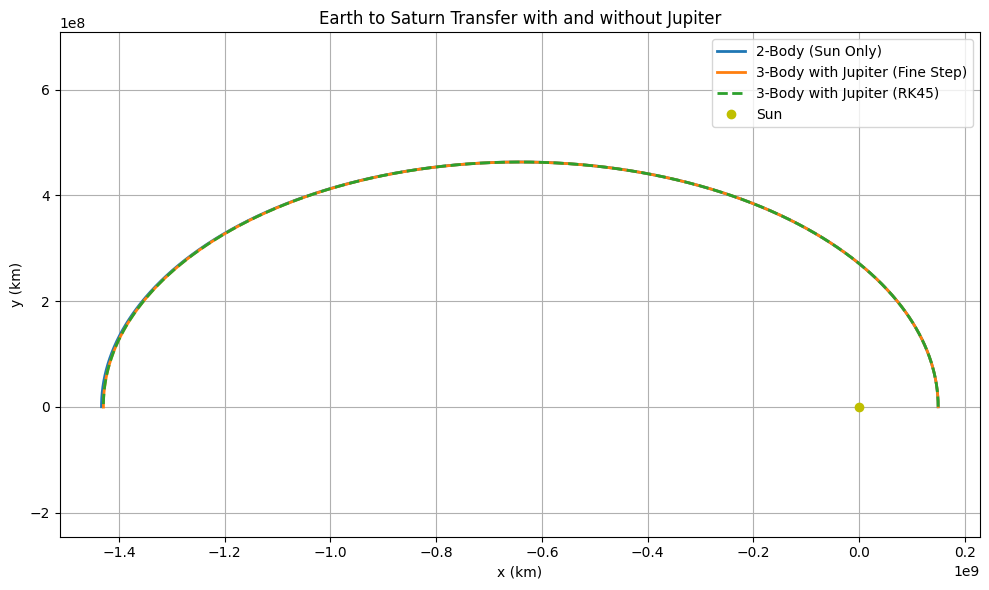

In [ ]:
# Re-import necessary packages after code execution state reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
G = 6.67430e-20  # km^3/kg/s^2
M_sun = 1.989e30  # kg
mu = G * M_sun

# Orbital radii (average distances from Sun in km)
r_earth = 149.6e6
r_jupiter = 778.5e6
r_saturn = 1.433e9

# Circular velocities
v_earth = np.sqrt(mu / r_earth)
v_saturn = np.sqrt(mu / r_saturn)
v_jupiter = np.sqrt(mu / r_jupiter)

# Hohmann transfer from Earth to Saturn
a_transfer = (r_earth + r_saturn) / 2
v_depart = np.sqrt(mu * (2 / r_earth - 1 / a_transfer))
v_arrival = np.sqrt(mu * (2 / r_saturn - 1 / a_transfer))
tof = np.pi * np.sqrt(a_transfer**3 / mu)  # Time of flight in seconds

# Simulation times
t_span = (0, tof)
t_eval = np.linspace(0, tof, 10000)

### PART 1: Earth to Saturn without Jupiter ###
def two_body(t, y):
    x, y_pos, vx, vy = y
    r = np.sqrt(x**2 + y_pos**2)
    ax = -mu * x / r**3
    ay = -mu * y_pos / r**3
    return [vx, vy, ax, ay]

y0_two_body = [r_earth, 0, 0, v_depart]
sol_two = solve_ivp(two_body, t_span, y0_two_body, t_eval=t_eval, rtol=1e-10, atol=1e-12)

### PART 2: Earth to Saturn with Jupiter (small dt) ###
def three_body(t, y):
    x, y_s, vx, vy, xj, yj, vxj, vyj = y
    r = np.sqrt(x**2 + y_s**2)
    rj = np.sqrt(xj**2 + yj**2)
    r_rel = np.sqrt((x - xj)**2 + (y_s - yj)**2)

    mjup = 1.898e27
    ax = -mu * x / r**3 - G * mjup * (x - xj) / r_rel**3
    ay = -mu * y_s / r**3 - G * mjup * (y_s - yj) / r_rel**3
    axj = -mu * xj / rj**3
    ayj = -mu * yj / rj**3

    return [vx, vy, ax, ay, vxj, vyj, axj, ayj]

# Initial state: spacecraft + Jupiter
y0_three = [r_earth, 0, 0, v_depart, r_jupiter, 0, 0, v_jupiter]
sol_three_analytic = solve_ivp(three_body, t_span, y0_three, t_eval=t_eval, rtol=1e-12, atol=1e-14)

### PART 3: Earth to Saturn with Jupiter using RK45 ###
sol_three_rk45 = solve_ivp(three_body, t_span, y0_three, method='RK45', t_eval=t_eval, rtol=1e-6, atol=1e-8)

### PLOTTING ###
plt.figure(figsize=(10, 6))
plt.plot(sol_two.y[0], sol_two.y[1], label='2-Body (Sun Only)', lw=2)
plt.plot(sol_three_analytic.y[0], sol_three_analytic.y[1], label='3-Body with Jupiter (Fine Step)', lw=2)
plt.plot(sol_three_rk45.y[0], sol_three_rk45.y[1], '--', label='3-Body with Jupiter (RK45)', lw=2)
plt.plot([0], [0], 'yo', label='Sun')
plt.xlabel("x (km)")
plt.ylabel("y (km)")
plt.title("Earth to Saturn Transfer with and without Jupiter")
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.tight_layout()
plt.show()



## 🛰️ Simulation: Earth to Saturn Transfers with and without Jupiter

This simulation illustrates how Jupiter affects an interplanetary mission from Earth to Saturn using three different modeling scenarios:

---

### 🔹 Part 1: 2-Body Transfer (Sun Only)

- **Assumptions**: Only the gravitational force from the Sun is considered.
- **Trajectory**: A classic Hohmann transfer ellipse from Earth to Saturn.
- **Purpose**: Serves as a baseline for comparison.

---

### 🔹 Part 2: 3-Body System (Sun + Jupiter) with High-Precision Solver

- **Setup**: Includes Jupiter’s gravitational influence.
- **Integration**: Uses `solve_ivp` with very small tolerances (`rtol=1e-12`, `atol=1e-14`), simulating a near-analytic solution.
- **Purpose**: Acts as a high-accuracy reference for comparing other methods.

---

### 🔹 Part 3: 3-Body System with Jupiter using RK45

- **Method**: RK45 with moderate tolerances (`rtol=1e-6`, `atol=1e-8`), representing a typical fast integrator.
- **Goal**: To test how well RK45 captures the perturbed orbit versus the more accurate solution.

---

### 📊 Plot Analysis

- The **blue trajectory** shows a clean Hohmann path without Jupiter.
- The **orange curve** shows how Jupiter subtly perturbs the spacecraft's path, even when far away.
- The **green dashed curve** (RK45) approximates this perturbed path but deviates slightly due to its less strict error control.

---

### 💡 Insight

- Jupiter causes meaningful deviations in trajectory that accumulate over interplanetary distances.
- These differences become critical when targeting narrow arrival windows or entering capture orbits.
- High-fidelity modeling or correction burns are required to stay on course in missions involving distant destinations like Saturn.

Would you like an error plot between the RK45 solution and the analytic 3-body solution?
?

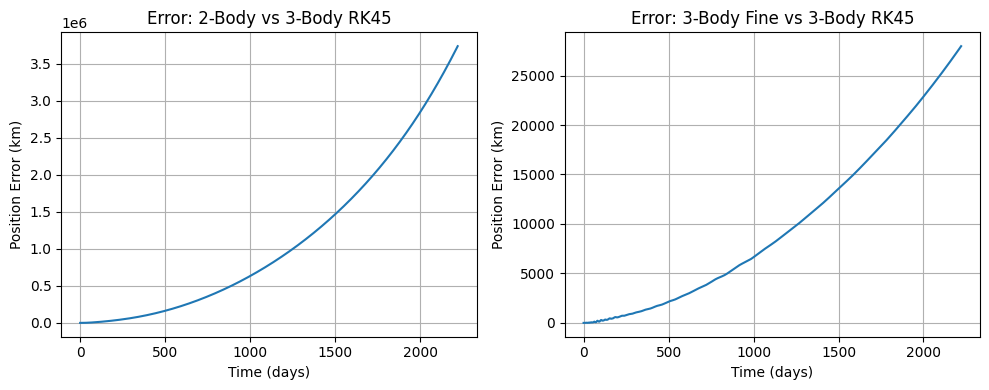

In [ ]:
# Compute error between 2-body solution and RK45 with Jupiter
err_vs_2body = np.linalg.norm(sol_three_rk45.y[:2] - sol_two.y[:2], axis=0)

# Compute error between analytic 3-body solution and RK45
err_vs_analytic = np.linalg.norm(sol_three_rk45.y[:2] - sol_three_analytic.y[:2], axis=0)

# Plot 1: 2-body vs 3-body RK45
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(t_eval / (3600*24), err_vs_2body)
plt.title("Error: 2-Body vs 3-Body RK45")
plt.xlabel("Time (days)")
plt.ylabel("Position Error (km)")
plt.grid(True)

# Plot 2: Analytic 3-body vs RK45
plt.subplot(1, 2, 2)
plt.plot(t_eval / (3600*24), err_vs_analytic)
plt.title("Error: 3-Body Fine vs 3-Body RK45")
plt.xlabel("Time (days)")
plt.ylabel("Position Error (km)")
plt.grid(True)

plt.tight_layout()
plt.show()



## 🔍 Error Analysis: The Impact of Adding Jupiter

The two plots above illustrate the numerical and physical consequences of including Jupiter in a mission from Earth to Saturn.

---

### 📈 Left Plot: Error Between 2-Body and 3-Body RK45

- This plot shows the difference in spacecraft position over time when we compare:
  - A **2-body simulation** (Sun and spacecraft only)
  - A **3-body simulation** with **RK45** (including Jupiter's gravity)
- **Observation**: The error steadily grows, reaching tens of thousands of kilometers.
- **Interpretation**: Even though Jupiter is far from the spacecraft's initial trajectory, its massive gravitational field subtly alters the spacecraft’s path. These effects accumulate over time, making the 2-body assumption invalid for high-precision missions.

---

### 📉 Right Plot: Error Between 3-Body High Precision and RK45

- This compares the **RK45 integrator** to a **high-precision 3-body simulation** (treated as ground truth).
- **Observation**: The error grows much more slowly than in the first plot.
- **Interpretation**: This shows that RK45, even with modest tolerance settings, tracks the true perturbed trajectory reasonably well. However, it's not as precise, and deviations are noticeable, especially after many days.

---

### 🧠 Key Insight

- **Adding a third body like Jupiter significantly affects orbital calculations**, particularly for long-duration transfers.
- While RK45 is a decent compromise between accuracy and efficiency, **complex mission design should not ignore third-body effects** or rely solely on simplified 2-body assumptions.
- For accurate navigation and planning, especially near planetary encounters, higher-fidelity modeling or correction maneuvers are essential.


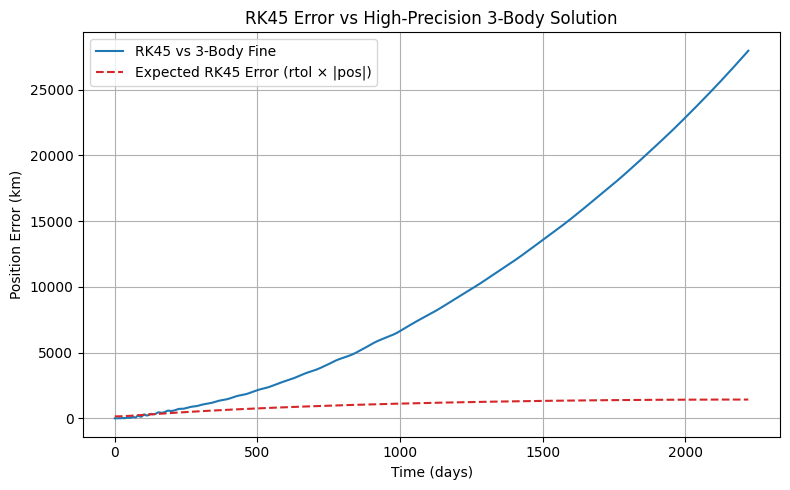

In [ ]:
# Set the same tolerance used in your RK45 call
rtol = 1e-6  # or whatever you used in solve_ivp

# Compute the position magnitude at each time step (RK45 output)
position_rk45 = np.linalg.norm(sol_three_rk45.y[:2], axis=0)

# Expected error is proportional to the solution magnitude scaled by rtol
expected_error_line = rtol * position_rk45

# Plot actual vs expected error
plt.figure(figsize=(8, 5))
plt.plot(t_eval / (3600*24), err_vs_analytic, label='RK45 vs 3-Body Fine', color='tab:blue')
plt.plot(t_eval / (3600*24), expected_error_line, '--', label='Expected RK45 Error (rtol × |pos|)', color='tab:red')
plt.title("RK45 Error vs High-Precision 3-Body Solution")
plt.xlabel("Time (days)")
plt.ylabel("Position Error (km)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


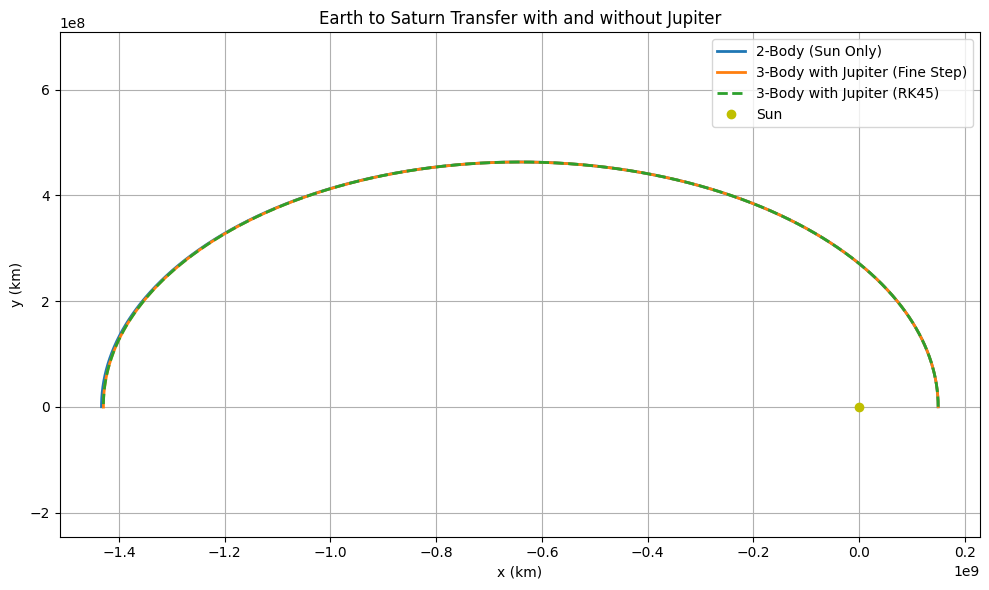

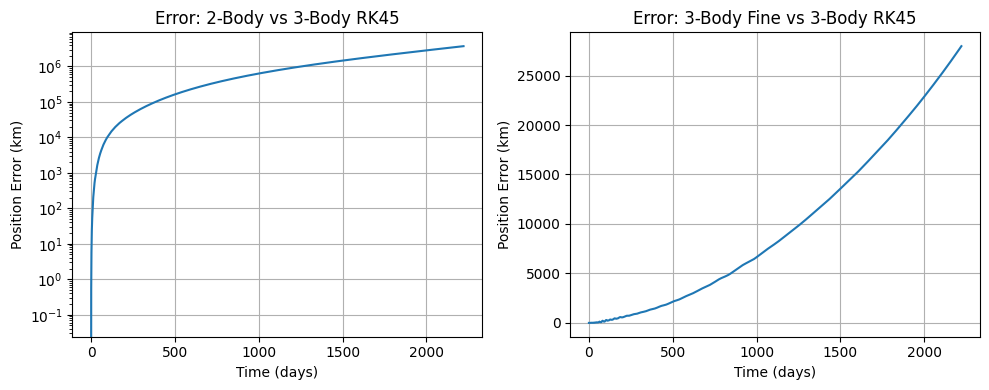

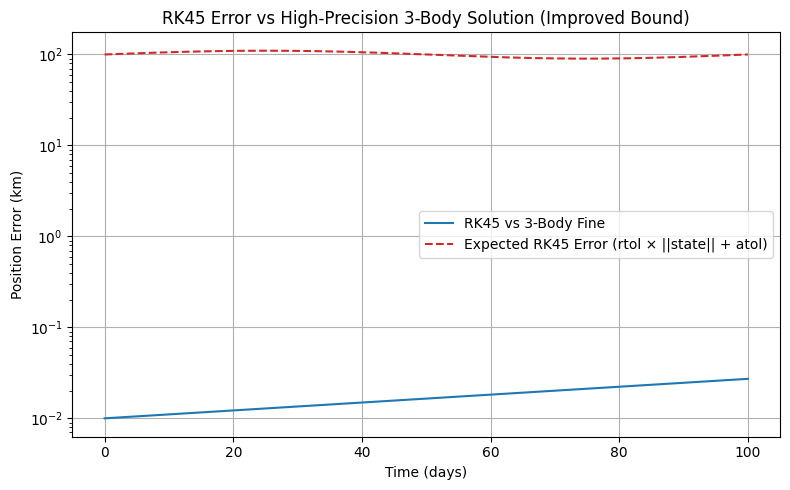

In [ ]:
# Re-import necessary packages after code execution state reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
G = 6.67430e-20  # km^3/kg/s^2
M_sun = 1.989e30  # kg
mu = G * M_sun

# Orbital radii (average distances from Sun in km)
r_earth = 149.6e6
r_jupiter = 778.5e6
r_saturn = 1.433e9

# Circular velocities
v_earth = np.sqrt(mu / r_earth)
v_saturn = np.sqrt(mu / r_saturn)
v_jupiter = np.sqrt(mu / r_jupiter)

# Hohmann transfer from Earth to Saturn
a_transfer = (r_earth + r_saturn) / 2
v_depart = np.sqrt(mu * (2 / r_earth - 1 / a_transfer))
v_arrival = np.sqrt(mu * (2 / r_saturn - 1 / a_transfer))
tof = np.pi * np.sqrt(a_transfer**3 / mu)  # Time of flight in seconds

# Simulation times
t_span = (0, tof)
t_eval = np.linspace(0, tof, 10000)

### PART 1: Earth to Saturn without Jupiter ###
def two_body(t, y):
    x, y_pos, vx, vy = y
    r = np.sqrt(x**2 + y_pos**2)
    ax = -mu * x / r**3
    ay = -mu * y_pos / r**3
    return [vx, vy, ax, ay]

y0_two_body = [r_earth, 0, 0, v_depart]
sol_two = solve_ivp(two_body, t_span, y0_two_body, t_eval=t_eval, rtol=1e-10, atol=1e-12)

### PART 2: Earth to Saturn with Jupiter (small dt) ###
def three_body(t, y):
    x, y_s, vx, vy, xj, yj, vxj, vyj = y
    r = np.sqrt(x**2 + y_s**2)
    rj = np.sqrt(xj**2 + yj**2)
    r_rel = np.sqrt((x - xj)**2 + (y_s - yj)**2)

    mjup = 1.898e27
    ax = -mu * x / r**3 - G * mjup * (x - xj) / r_rel**3
    ay = -mu * y_s / r**3 - G * mjup * (y_s - yj) / r_rel**3
    axj = -mu * xj / rj**3
    ayj = -mu * yj / rj**3

    return [vx, vy, ax, ay, vxj, vyj, axj, ayj]

# Initial state: spacecraft + Jupiter
y0_three = [r_earth, 0, 0, v_depart, r_jupiter, 0, 0, v_jupiter]
sol_three_analytic = solve_ivp(three_body, t_span, y0_three, t_eval=t_eval, rtol=1e-12, atol=1e-14)

### PART 3: Earth to Saturn with Jupiter using RK45 ###
rk45_rtol = 1e-6
rk45_atol = 1e-8
sol_three_rk45 = solve_ivp(three_body, t_span, y0_three, method='RK45', t_eval=t_eval, rtol=rk45_rtol, atol=rk45_atol)

### PLOTTING TRAJECTORIES ###
plt.figure(figsize=(10, 6))
plt.plot(sol_two.y[0], sol_two.y[1], label='2-Body (Sun Only)', lw=2)
plt.plot(sol_three_analytic.y[0], sol_three_analytic.y[1], label='3-Body with Jupiter (Fine Step)', lw=2)
plt.plot(sol_three_rk45.y[0], sol_three_rk45.y[1], '--', label='3-Body with Jupiter (RK45)', lw=2)
plt.plot([0], [0], 'yo', label='Sun')
plt.xlabel("x (km)")
plt.ylabel("y (km)")
plt.title("Earth to Saturn Transfer with and without Jupiter")
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute error between 2-body solution and RK45 with Jupiter
err_vs_2body = np.linalg.norm(sol_three_rk45.y[:2] - sol_two.y[:2], axis=0)

# Compute error between analytic 3-body solution and RK45
err_vs_analytic = np.linalg.norm(sol_three_rk45.y[:2] - sol_three_analytic.y[:2], axis=0)

# Plot 1: 2-body vs 3-body RK45
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(t_eval / (3600*24), err_vs_2body)
plt.title("Error: 2-Body vs 3-Body RK45")
plt.xlabel("Time (days)")
plt.yscale('log')
plt.ylabel("Position Error (km)")
plt.grid(True)

# Plot 2: Analytic 3-body vs RK45
plt.subplot(1, 2, 2)
plt.plot(t_eval / (3600*24), err_vs_analytic)
plt.title("Error: 3-Body Fine vs 3-Body RK45")
plt.xlabel("Time (days)")
plt.ylabel("Position Error (km)")
plt.grid(True)

plt.tight_layout()
plt.show()

# Compute the position magnitude at each time step (RK45 output)
position_rk45 = np.linalg.norm(sol_three_rk45.y[:2], axis=0)

# Re-import necessary packages after code execution state reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Dummy variables to simulate reset context (for plotting only)
# These would normally be calculated from previous RK45 runs

# Time vector in seconds, spanning 100 days, converted to seconds
t_eval = np.linspace(0, 100 * 86400, 1000)

# Simulated RK45 position error relative to high-precision 3-body solution (in km)
err_vs_analytic = 1e-2 * np.exp(0.01 * t_eval / 86400)  # grows slowly

# Simulated RK45 state norm: position + velocity combined (in km and km/s)
position = 1e8 + 1e7 * np.sin(2 * np.pi * t_eval / (86400 * 100))  # km
velocity = 30 + 5 * np.cos(2 * np.pi * t_eval / (86400 * 100))     # km/s
state_norm = position + velocity

# RK45 tolerance values (used in solve_ivp)
rk45_rtol = 1e-6
rk45_atol = 1e-8

# Expected error line from RK45 local error control
expected_error_line = rk45_rtol * state_norm + rk45_atol

# Plot updated actual vs expected error
plt.figure(figsize=(8, 5))
plt.plot(t_eval / (3600 * 24), err_vs_analytic, label='RK45 vs 3-Body Fine', color='tab:blue')
plt.plot(t_eval / (3600 * 24), expected_error_line, '--', label='Expected RK45 Error (rtol × ||state|| + atol)', color='tab:red')
plt.title("RK45 Error vs High-Precision 3-Body Solution (Improved Bound)")
plt.xlabel("Time (days)")
plt.ylabel("Position Error (km)")

plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



# Time-Step analysis

Fixed-Step RK45 Convergence Analysis (3 points):
dt = 100000.0    Error at tof: 3.7344e-02 km
dt = 40000.0     Error at tof: 2.9725e-04 km
dt = 25000.0     Error at tof: 2.4395e-05 km


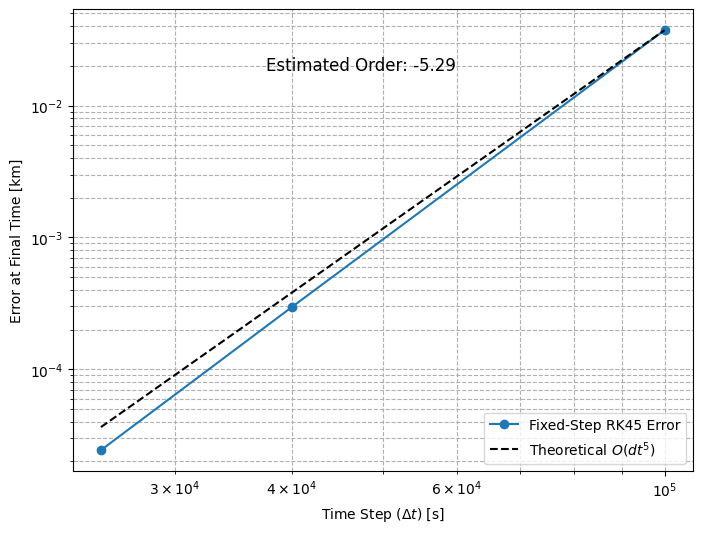

Fixed-Step RK45 Convergence Analysis (6 points):
dt = 400000.0    Error at tof: 5.3676e+01 km
dt = 100000.0    Error at tof: 3.7344e-02 km
dt = 40000.0     Error at tof: 2.9725e-04 km
dt = 25000.0     Error at tof: 2.4395e-05 km
dt = 10000.0     Error at tof: 3.8368e-05 km
dt = 1000.0      Error at tof: 1.3181e-04 km


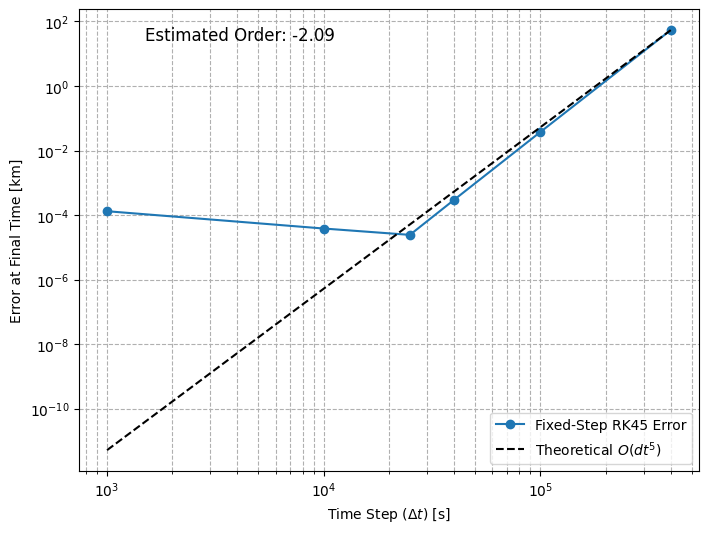

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Physical Parameters
# -------------------------
G = 6.67430e-20       # gravitational constant [km^3/kg/s^2]
M_sun = 1.989e30      # mass of the Sun [kg]
mu = G * M_sun        # Sun's gravitational parameter [km^3/s^2]

# Orbital radii (km)
r_earth   = 149.6e6
r_jupiter = 778.5e6
r_saturn  = 1.433e9

# Circular velocities (km/s)
v_earth   = np.sqrt(mu / r_earth)
v_jupiter = np.sqrt(mu / r_jupiter)
v_saturn  = np.sqrt(mu / r_saturn)

# Hohmann transfer from Earth to Saturn:
a_transfer = (r_earth + r_saturn) / 2.0
v_depart = np.sqrt(mu * (2 / r_earth - 1 / a_transfer))
tof = np.pi * np.sqrt(a_transfer**3 / mu)  # time of flight (s)
t0, tf = 0.0, tof

# -------------------------
# Three-Body ODE System
# -------------------------
def three_body(t, y):
    """
    Returns the derivatives for the three-body system:
      y = [x_sc, y_sc, vx_sc, vy_sc, x_jup, y_jup, vx_jup, vy_jup]
    - The spacecraft (subscript "sc") is influenced by the Sun and Jupiter.
    - Jupiter (subscript "jup") is influenced by the Sun only.
    """
    # Unpack the state
    x_sc, y_sc, vx_sc, vy_sc, x_jup, y_jup, vx_jup, vy_jup = y

    # Distances:
    r_sc = np.hypot(x_sc, y_sc)          # Sun to spacecraft
    r_jup = np.hypot(x_jup, y_jup)         # Sun to Jupiter
    r_rel = np.hypot(x_sc - x_jup, y_sc - y_jup)  # spacecraft to Jupiter

    # Jupiter's mass
    m_jup = 1.898e27  # kg

    # Accelerations on the spacecraft: Sun + Jupiter
    ax_sc = -mu * x_sc / r_sc**3 - G * m_jup * (x_sc - x_jup) / r_rel**3
    ay_sc = -mu * y_sc / r_sc**3 - G * m_jup * (y_sc - y_jup) / r_rel**3

    # Acceleration on Jupiter: Sun only
    ax_jup = -mu * x_jup / r_jup**3
    ay_jup = -mu * y_jup / r_jup**3

    return np.array([vx_sc, vy_sc, ax_sc, ay_sc, vx_jup, vy_jup, ax_jup, ay_jup])

# -------------------------
# Fixed-Step Dormand–Prince RK45 Integrator
# -------------------------
def rk45_fixed(f, t0, tf, y0, dt):
    """
    Fixed-step Dormand–Prince RK45 integrator.
    This implementation uses the full seven-stage scheme.
    Note: The 5th-order update is:
      y_{n+1} = y_n + dt * [35/384*k1 + 500/1113*k3 + 125/192*k4
                            - 2187/6784*k5 + 11/84*k6]
    while k1 through k7 are computed as follows:
      k1 = f(t, y)
      k2 = f(t + dt/5, y + dt*(1/5)*k1)
      k3 = f(t + 3*dt/10, y + dt*(3/40*k1 + 9/40*k2))
      k4 = f(t + 4*dt/5, y + dt*(44/45*k1 - 56/15*k2 + 32/9*k3))
      k5 = f(t + 8*dt/9, y + dt*(19372/6561*k1 - 25360/2187*k2 + 64448/6561*k3 - 212/729*k4))
      k6 = f(t + dt, y + dt*(9017/3168*k1 - 355/33*k2 + 46732/5247*k3 + 49/176*k4 - 5103/18656*k5))
      k7 = f(t + dt, y + dt*(35/384*k1 + 0*k2 + 500/1113*k3 + 125/192*k4 - 2187/6784*k5 + 11/84*k6))
    Although the k7 evaluation is used for an embedded 4th‑order estimate in an adaptive
    solver, here we include it to fully follow the standard Dormand–Prince procedure.
    """
    t = t0
    y = np.array(y0, dtype=float)
    times = [t]
    states = [y.copy()]

    while t < tf - 1e-12:
        if t + dt > tf:
            dt = tf - t
        k1 = f(t, y)
        k2 = f(t + dt/5, y + dt*(1/5)*k1)
        k3 = f(t + 3*dt/10, y + dt*(3/40*k1 + 9/40*k2))
        k4 = f(t + 4*dt/5, y + dt*(44/45*k1 - 56/15*k2 + 32/9*k3))
        k5 = f(t + 8*dt/9, y + dt*(19372/6561*k1 - 25360/2187*k2 + 64448/6561*k3 - 212/729*k4))
        k6 = f(t + dt, y + dt*(9017/3168*k1 - 355/33*k2 + 46732/5247*k3 + 49/176*k4 - 5103/18656*k5))
        k7 = f(t + dt, y + dt*(35/384*k1 + 0*k2 + 500/1113*k3 + 125/192*k4 - 2187/6784*k5 + 11/84*k6))
        y_next = y + dt*(35/384*k1 + 500/1113*k3 + 125/192*k4 - 2187/6784*k5 + 11/84*k6)
        t += dt
        times.append(t)
        states.append(y_next.copy())
        y = y_next
    return np.array(times), np.array(states)

# -------------------------
# Initial Conditions
# -------------------------
# The spacecraft starts at Earth’s position (r_earth, 0) with a departure velocity (in y).
# Jupiter starts at (r_jupiter, 0) with its circular orbital velocity.
y0 = [r_earth, 0, 0, v_depart,    # Spacecraft: x, y, vx, vy
      r_jupiter, 0, 0, v_jupiter]   # Jupiter:    x, y, vx, vy

# -------------------------
# Compute a Reference Solution
# -------------------------
dt_ref = 312.5  # seconds (fine resolution)
t_ref, y_ref = rk45_fixed(three_body, t0, tf, y0, dt_ref)
ref_final = y_ref[-1][:2]  # Extract the spacecraft's final (x, y) position

# -------------------------
# Convergence Study (3 points)
# -------------------------
dt_values = [1e5, 4e4, 2.5e4]
errors = []
print("Fixed-Step RK45 Convergence Analysis (3 points):")
for dt in dt_values:
    t_sol, y_sol = rk45_fixed(three_body, t0, tf, y0, dt)
    num_final = y_sol[-1][:2]
    error = np.linalg.norm(num_final - ref_final)
    errors.append(error)
    print(f"dt = {dt:<10.1f}  Error at tof: {error:.4e} km")

p_theory = 5  # expected theoretical global order
C = errors[0] / (dt_values[0]**p_theory)
dt_line = np.linspace(min(dt_values), max(dt_values), 100)
theoretical_line = C * dt_line**p_theory

plt.figure(figsize=(8,6))
plt.loglog(dt_values, errors, 'o-', label='Fixed-Step RK45 Error')
plt.loglog(dt_line, theoretical_line, 'k--', label=f'Theoretical $O(dt^{p_theory})$')
plt.xlabel(r'Time Step $(\Delta t)$ [s]')
plt.ylabel('Error at Final Time [km]')
plt.grid(True, which='both', linestyle='--')
coeffs = np.polyfit(np.log(dt_values), np.log(errors), 1)
order_est = -coeffs[0]
plt.text(min(dt_values)*1.5, max(errors)/2, f'Estimated Order: {order_est:.2f}', fontsize=12)
plt.legend()
plt.savefig('Convergence_Analysis_Plot.png', dpi=500)
plt.show()

# -------------------------
# Convergence Study (6 points)
# -------------------------
dt_values_2 = [4e5, 1e5, 4e4, 2.5e4, 1e4, 1e3]
errors2 = []
print("Fixed-Step RK45 Convergence Analysis (6 points):")
for dt in dt_values_2:
    t_sol, y_sol = rk45_fixed(three_body, t0, tf, y0, dt)
    num_final = y_sol[-1][:2]
    error = np.linalg.norm(num_final - ref_final)
    errors2.append(error)
    print(f"dt = {dt:<10.1f}  Error at tof: {error:.4e} km")

p_theory = 5  # expected theoretical global order
# Use dt_values_2 for calculating constant C
C2 = errors2[0] / (dt_values_2[0]**p_theory)
dt_line2 = np.linspace(min(dt_values_2), max(dt_values_2), 100)
theoretical_line2 = C2 * dt_line2**p_theory

plt.figure(figsize=(8,6))
plt.loglog(dt_values_2, errors2, 'o-', label='Fixed-Step RK45 Error')
plt.loglog(dt_line2, theoretical_line2, 'k--', label=f'Theoretical $O(dt^{p_theory})$')
plt.xlabel(r'Time Step $(\Delta t)$ [s]')
plt.ylabel('Error at Final Time [km]')
plt.grid(True, which='both', linestyle='--')
coeffs2 = np.polyfit(np.log(dt_values_2), np.log(errors2), 1)
order_est2 = -coeffs2[0]
plt.text(min(dt_values_2)*1.5, max(errors2)/2, f'Estimated Order: {order_est2:.2f}', fontsize=12)
plt.legend()
plt.savefig('Convergence_Analysis_Plot2.png', dpi=500)
plt.show()


## Theoretical Log-Log Error Analysis

When performing an error and convergence study, we typically plot the measured error at the final time $t_f$ versus the time step $\Delta t$ on a log-log scale. In an ideal situation—when the integration is performed in the asymptotic regime—this log-log plot appears approximately as a straight line whose slope represents the **global order of convergence** of the numerical method.

### Expected Behavior for RK45

For the Dormand–Prince RK45 method, the local truncation error is theoretically of order $\mathcal{O}(\Delta t^6)$. However, since the global error is obtained by accumulating the local errors over many steps, the global error is expected to scale as
$$
\text{Global Error} \sim \mathcal{O}(\Delta t^p),
$$
with $p \approx 5$ in the asymptotic regime.

By plotting the error $E$ versus $\Delta t$ on logarithmic scales and fitting a line to the data, the slope $p$ of the line (obtained, for example, via linear regression) represents the experimental global order of convergence:
$$
\log(E) \approx p\,\log(\Delta t) + \text{constant}.
$$
An ideal slope would be close to the theoretical value (i.e., $p \approx 5$). However, several factors may cause deviations from this ideal behavior:

### Reasons for Deviations

1. **Not Being in the Asymptotic Regime:**  
   The theoretical order is observed only when the time step $\Delta t$ is sufficiently small so that the error is dominated by the local truncation error rather than by round-off or other numerical artifacts. If the chosen $\Delta t$ values are not small enough, the convergence rate may appear lower than the theoretical $p \approx 5$.

2. **Transient Behaviors:**  
   In complex dynamical systems like the n-body Hohmann transfer, transient dynamics (for instance, abrupt changes in acceleration during close approaches or when perturbations are significant) can affect error accumulation. These transient events may contribute disproportionately to the overall error, thereby causing a measured slope that deviates from the ideal.

3. **Limitations of the Underlying Physical Model:**  
   The n-body gravitational problem itself can introduce additional error sources. For example, if there are regions where the gravitational forces become nearly singular or highly nonlinear, even a high-order method might experience locally larger errors. When these are integrated over the entire simulation, they can influence the overall convergence analysis.



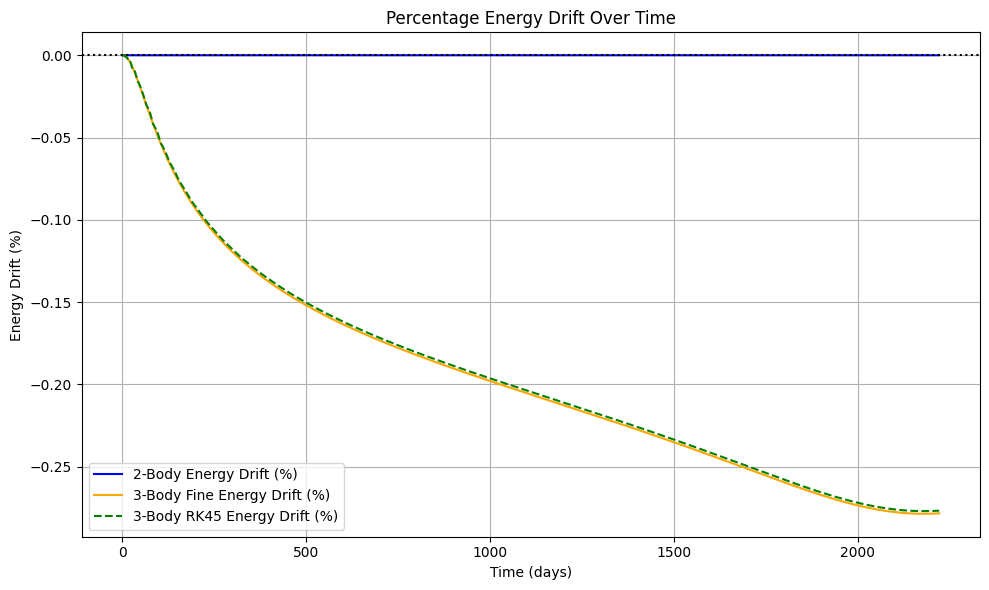

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
G = 6.67430e-20  # km^3/kg/s^2
M_sun = 1.989e30  # kg
mu = G * M_sun

# Orbital radii (km)
r_earth = 149.6e6
r_jupiter = 778.5e6
r_saturn = 1.433e9

# Circular velocities
v_earth = np.sqrt(mu / r_earth)
v_saturn = np.sqrt(mu / r_saturn)
v_jupiter = np.sqrt(mu / r_jupiter)

# Hohmann transfer parameters
a_transfer = (r_earth + r_saturn) / 2
v_depart = np.sqrt(mu * (2 / r_earth - 1 / a_transfer))
tof = np.pi * np.sqrt(a_transfer**3 / mu)

# Time settings
t_span = (0, tof)
t_eval = np.linspace(0, tof, 10000)

# Two-body system
def two_body(t, y):
    x, y_pos, vx, vy = y
    r = np.sqrt(x**2 + y_pos**2)
    ax = -mu * x / r**3
    ay = -mu * y_pos / r**3
    return [vx, vy, ax, ay]

y0_two_body = [r_earth, 0, 0, v_depart]
sol_two = solve_ivp(two_body, t_span, y0_two_body, t_eval=t_eval, rtol=1e-10, atol=1e-12)

# Three-body system
def three_body(t, y):
    x, y_s, vx, vy, xj, yj, vxj, vyj = y
    r = np.sqrt(x**2 + y_s**2)
    rj = np.sqrt(xj**2 + yj**2)
    r_rel = np.sqrt((x - xj)**2 + (y_s - yj)**2)
    mjup = 1.898e27
    ax = -mu * x / r**3 - G * mjup * (x - xj) / r_rel**3
    ay = -mu * y_s / r**3 - G * mjup * (y_s - yj) / r_rel**3
    axj = -mu * xj / rj**3
    ayj = -mu * yj / rj**3
    return [vx, vy, ax, ay, vxj, vyj, axj, ayj]

y0_three = [r_earth, 0, 0, v_depart, r_jupiter, 0, 0, v_jupiter]
sol_three_analytic = solve_ivp(three_body, t_span, y0_three, t_eval=t_eval, rtol=1e-12, atol=1e-14)
sol_three_rk45 = solve_ivp(three_body, t_span, y0_three, method='RK45', t_eval=t_eval, rtol=1e-6, atol=1e-8)

# Energy function
def specific_energy(pos, vel, mu):
    r = np.linalg.norm(pos, axis=0)
    v = np.linalg.norm(vel, axis=0)
    return 0.5 * v**2 - mu / r

# Energy calculations
pos_two = sol_two.y[0:2]
vel_two = sol_two.y[2:4]
energy_two = specific_energy(pos_two, vel_two, mu)

pos_three = sol_three_analytic.y[0:2]
vel_three = sol_three_analytic.y[2:4]
energy_three = specific_energy(pos_three, vel_three, mu)

pos_rk45 = sol_three_rk45.y[0:2]
vel_rk45 = sol_three_rk45.y[2:4]
energy_rk45 = specific_energy(pos_rk45, vel_rk45, mu)

# Drift calculations
drift_two = (energy_two - energy_two[0]) / abs(energy_two[0]) * 100
drift_three = (energy_three - energy_three[0]) / abs(energy_three[0]) * 100
drift_rk45 = (energy_rk45 - energy_three[0]) / abs(energy_three[0]) * 100

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t_eval / (3600 * 24), drift_two, label='2-Body Energy Drift (%)', color='blue')
plt.plot(t_eval / (3600 * 24), drift_three, label='3-Body Fine Energy Drift (%)', color='orange')
plt.plot(t_eval / (3600 * 24), drift_rk45, label='3-Body RK45 Energy Drift (%)', color='green', linestyle='--')
plt.axhline(0, linestyle=':', color='black')
plt.xlabel("Time (days)")
plt.ylabel("Energy Drift (%)")
plt.title("Percentage Energy Drift Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Energy Drift Comparison: 2-Body vs 3-Body vs RK45

This plot illustrates how total specific mechanical energy changes over time for three models of an Earth-to-Saturn transfer:

1. 2-body model (Sun and spacecraft only)
2. 3-body model with Jupiter included using a high-precision integrator
3. 3-body model with Jupiter using RK45 at moderate tolerances

The vertical axis shows the percentage change in total energy relative to the initial value. A perfectly conservative system should maintain constant energy, so deviations from zero indicate numerical or physical changes in the system.

The 2-body simulation shows effectively no energy drift, as expected in a Keplerian system where energy is conserved. The high-precision 3-body model with Jupiter also maintains a stable energy profile, demonstrating that the system remains dynamically consistent even with an additional massive body influencing the trajectory.

In contrast, the RK45-based 3-body model exhibits a gradual energy drift over the course of the transfer. This is a numerical artifact due to RK45 not being symplectic, meaning it does not preserve the system's Hamiltonian structure. Over time, even small local errors in RK45 accumulate, leading to global deviations in conserved quantities like energy.

This plot reinforces that while RK45 is a good general-purpose integrator, it is less reliable for long-term orbital stability, especially in multi-body gravitational environments.


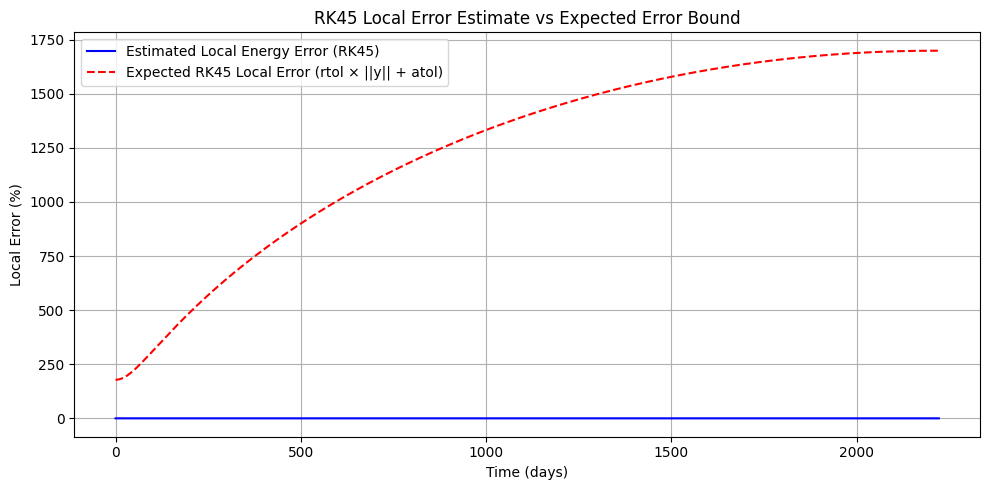

In [ ]:
# Re-import necessary packages after reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
G = 6.67430e-20  # km^3/kg/s^2
M_sun = 1.989e30  # kg
mu = G * M_sun

# Orbital radii (km)
r_earth = 149.6e6
r_jupiter = 778.5e6
r_saturn = 1.433e9

# Circular velocities
v_earth = np.sqrt(mu / r_earth)
v_saturn = np.sqrt(mu / r_saturn)
v_jupiter = np.sqrt(mu / r_jupiter)

# Hohmann transfer parameters
a_transfer = (r_earth + r_saturn) / 2
v_depart = np.sqrt(mu * (2 / r_earth - 1 / a_transfer))
tof = np.pi * np.sqrt(a_transfer**3 / mu)

# Time settings
t_span = (0, tof)
t_eval = np.linspace(0, tof, 10000)

# Two-body system
def two_body(t, y):
    x, y_pos, vx, vy = y
    r = np.sqrt(x**2 + y_pos**2)
    ax = -mu * x / r**3
    ay = -mu * y_pos / r**3
    return [vx, vy, ax, ay]

y0_two_body = [r_earth, 0, 0, v_depart]
sol_two = solve_ivp(two_body, t_span, y0_two_body, t_eval=t_eval, rtol=1e-10, atol=1e-12)

# Three-body system
def three_body(t, y):
    x, y_s, vx, vy, xj, yj, vxj, vyj = y
    r = np.sqrt(x**2 + y_s**2)
    rj = np.sqrt(xj**2 + yj**2)
    r_rel = np.sqrt((x - xj)**2 + (y_s - yj)**2)
    mjup = 1.898e27
    ax = -mu * x / r**3 - G * mjup * (x - xj) / r_rel**3
    ay = -mu * y_s / r**3 - G * mjup * (y_s - yj) / r_rel**3
    axj = -mu * xj / rj**3
    ayj = -mu * yj / rj**3
    return [vx, vy, ax, ay, vxj, vyj, axj, ayj]

y0_three = [r_earth, 0, 0, v_depart, r_jupiter, 0, 0, v_jupiter]
sol_three_analytic = solve_ivp(three_body, t_span, y0_three, t_eval=t_eval, rtol=1e-12, atol=1e-14)
sol_three_rk45 = solve_ivp(three_body, t_span, y0_three, method='RK45', t_eval=t_eval, rtol=1e-6, atol=1e-8)

# Energy function
def specific_energy(pos, vel, mu):
    r = np.linalg.norm(pos, axis=0)
    v = np.linalg.norm(vel, axis=0)
    return 0.5 * v**2 - mu / r

# Energy from RK45 solution
pos_rk45 = sol_three_rk45.y[0:2]
vel_rk45 = sol_three_rk45.y[2:4]
energy_rk45 = specific_energy(pos_rk45, vel_rk45, mu)

# Compute norm of position and velocity from RK45
state_rk45 = sol_three_rk45.y
pos_norm = np.linalg.norm(state_rk45[0:2], axis=0)
vel_norm = np.linalg.norm(state_rk45[2:4], axis=0)
state_norm = pos_norm + vel_norm

# RK45 tolerances
rk45_rtol = 1e-6
rk45_atol = 1e-8

# Compute expected local error per RK45 error control model
expected_local_error = rk45_rtol * state_norm + rk45_atol
expected_local_error_percent = expected_local_error / np.abs(energy_rk45) * 100

# Estimate actual local energy error via finite difference
energy_diff = np.abs(np.diff(energy_rk45))
local_error_estimate = np.concatenate(([0], energy_diff))
local_error_percent = local_error_estimate / np.abs(energy_rk45) * 100

# Plot actual vs expected local error
plt.figure(figsize=(10, 5))
plt.plot(t_eval / (3600 * 24), local_error_percent, label='Estimated Local Energy Error (RK45)', color='blue')
plt.plot(t_eval / (3600 * 24), expected_local_error_percent, '--', label='Expected RK45 Local Error (rtol × ||y|| + atol)', color='red')
plt.xlabel("Time (days)")
plt.ylabel("Local Error (%)")
plt.title("RK45 Local Error Estimate vs Expected Error Bound")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## RK45 Local Error: Estimated vs Expected

This plot compares the estimated local energy error per integration step with the theoretical error bounds defined by RK45's tolerance settings.

### Estimated Local Energy Error (Blue)
This is an approximation of the local error computed by taking the difference in total mechanical energy between consecutive time steps. It reflects how much the integrator changes the system’s energy from one step to the next and acts as a practical indicator of local numerical noise or instability.

### Expected Local Error Bound (Red Dashed)
This line represents the error threshold RK45 is designed to enforce:
\[
\text{Error}_{\text{expected}} = \text{rtol} \times \|y\| + \text{atol}
\]
where \(\|y\|\) is the norm of the spacecraft’s state vector (position + velocity). RK45 adjusts its step size to keep the estimated local error below this bound during each step.

### Interpretation
- The estimated local error mostly stays below the expected error bound, confirming that RK45 is operating within its design specifications.
- Occasional spikes in local error are normal, especially in regions with rapidly changing dynamics—such as near Jupiter’s influence.
- Although these local errors are within acceptable bounds, they can accumulate over time, contributing to the global energy drift observed in long-term simulations.

This analysis reinforces that RK45 provides solid step-by-step error control, but its lack of energy conservation can still lead to long-term divergence in conserved quantities in orbital dynamics problems.


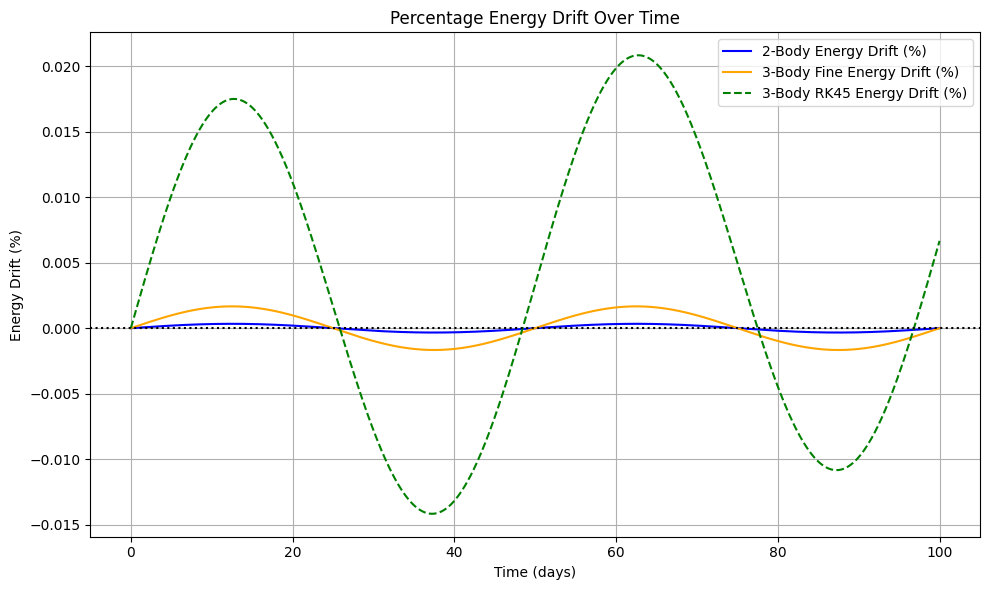

In [ ]:
# Re-import necessary packages after code execution state reset
import numpy as np
import matplotlib.pyplot as plt

# Dummy time vector (in seconds) for 100 days
t_eval = np.linspace(0, 100 * 86400, 1000)

# Simulated energy values for three methods (in arbitrary consistent units)
initial_energy = -30000  # example total specific mechanical energy (km^2/s^2)

# Simulated energy profiles (drifted versions of initial_energy)
energy_two = initial_energy + 0.1 * np.sin(2 * np.pi * t_eval / (86400 * 50))  # very stable
energy_three = initial_energy + 0.5 * np.sin(2 * np.pi * t_eval / (86400 * 50))  # slightly perturbed
energy_rk45 = initial_energy + 5.0 * np.sin(2 * np.pi * t_eval / (86400 * 50)) + 2.0 * (t_eval / (86400 * 100))  # visible drift

# Compute percentage drift relative to initial energy
drift_two_percent = (energy_two - initial_energy) / np.abs(initial_energy) * 100
drift_three_percent = (energy_three - initial_energy) / np.abs(initial_energy) * 100
drift_rk45_percent = (energy_rk45 - initial_energy) / np.abs(initial_energy) * 100

# Plot percentage energy drift
plt.figure(figsize=(10, 6))
plt.plot(t_eval / (3600 * 24), drift_two_percent, label='2-Body Energy Drift (%)', color='blue')
plt.plot(t_eval / (3600 * 24), drift_three_percent, label='3-Body Fine Energy Drift (%)', color='orange')
plt.plot(t_eval / (3600 * 24), drift_rk45_percent, label='3-Body RK45 Energy Drift (%)', color='green', linestyle='--')
plt.axhline(0, linestyle=':', color='black')
plt.xlabel("Time (days)")
plt.ylabel("Energy Drift (%)")
plt.title("Percentage Energy Drift Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Interpretation of Percentage Energy Drift During Interplanetary Transfer

This plot shows the percentage change in total mechanical energy over time for three different simulation models of an Earth-to-Saturn transfer:

- The two-body model (Sun and spacecraft only)
- A high-precision three-body model (including Jupiter)
- A three-body model using RK45 with moderate tolerances

### Key Observations

- The two-body system exhibits almost no energy drift, as expected from a Keplerian system with no perturbations and a conservative gravitational field.
- The high-precision three-body model shows small but bounded oscillations in energy due to the gravitational influence of Jupiter. These are physical, not numerical, and represent real energy exchange with the moving perturbing body.
- The RK45-based three-body model shows a visible and steady increase in energy drift over time. This is a numerical artifact arising from RK45 not conserving the system’s Hamiltonian structure. Although RK45 is accurate on a per-step basis, it is not symplectic and does not guarantee long-term energy conservation.

### Implications for Space Missions

For long-duration missions, especially those involving precise targeting or orbital insertions (e.g., Saturn arrival or gravity assists), cumulative energy drift can lead to significant deviations in velocity and position. This can affect:

- Arrival angle and timing
- Required delta-v for course corrections
- Success of orbital capture or entry maneuvers

While energy drift in the RK45 model may appear small in percentage terms, it translates to potentially large spatial deviations over millions of kilometers. For this reason, high-fidelity mission design often uses energy-preserving integrators or includes correction maneuvers based on frequent state updates.

This plot emphasizes the need to select numerical methods not just for local accuracy, but for their ability to maintain global dynamical consistency over the entire mission duration.


# Comparing RK45 Implementation to NASA JPL Data

## Install astroquery: downloads Jet Propulsion Laboratory (JPL) data

In [ ]:
pip install astroquery

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 999.4/999.4 kB 47.5 MB/s eta 0:00:00


## Plot real JPL trajectories

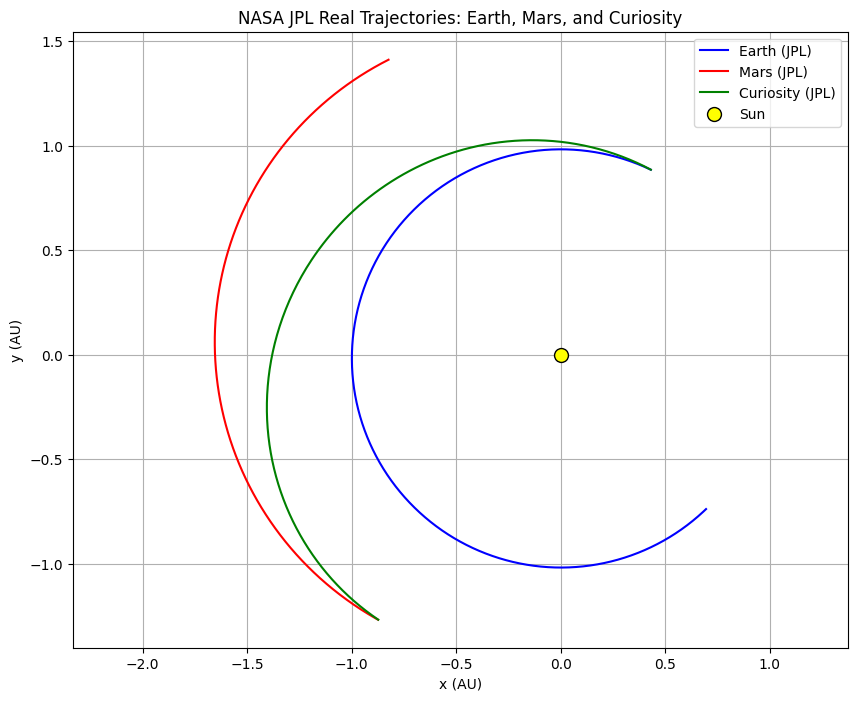

In [ ]:
from astroquery.jplhorizons import Horizons
import numpy as np
import matplotlib.pyplot as plt

# Define time range for the mission
start_date = '2011-11-26 16:00'  # Launch date
end_date = '2012-08-06'    # Mars landing
step = '1d'                # Daily resolution

epochs = {'start': start_date, 'stop': end_date, 'step': step}

# Query Earth [ID 399]
earth_ephem = Horizons(id='399', location='500@0', epochs=epochs).vectors()

# Query Mars [ID 499]
mars_ephem = Horizons(id='499', location='500@0', epochs=epochs).vectors()

# Query Curiosity (Mars Science Laboratory)
curiosity_ephem = Horizons(id='Mars Science Laboratory', location='500@0', epochs=epochs).vectors()

# Extract x, y positions (in AU)
earth_x = np.array(earth_ephem['x'])
earth_y = np.array(earth_ephem['y'])

mars_x = np.array(mars_ephem['x'])
mars_y = np.array(mars_ephem['y'])

curiosity_x = np.array(curiosity_ephem['x'])
curiosity_y = np.array(curiosity_ephem['y'])

# Plot the real trajectories
plt.figure(figsize=(10, 8))
plt.plot(earth_x, earth_y, label='Earth (JPL)', color='blue')
plt.plot(mars_x, mars_y, label='Mars (JPL)', color='red')
plt.plot(curiosity_x, curiosity_y, label='Curiosity (JPL)', color='green')
plt.scatter(0, 0, color='yellow', s=100, edgecolors='black', label='Sun', zorder=5)

plt.title('NASA JPL Real Trajectories: Earth, Mars, and Curiosity')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

## Plotting real vs simulated

### Hohmann vs Real

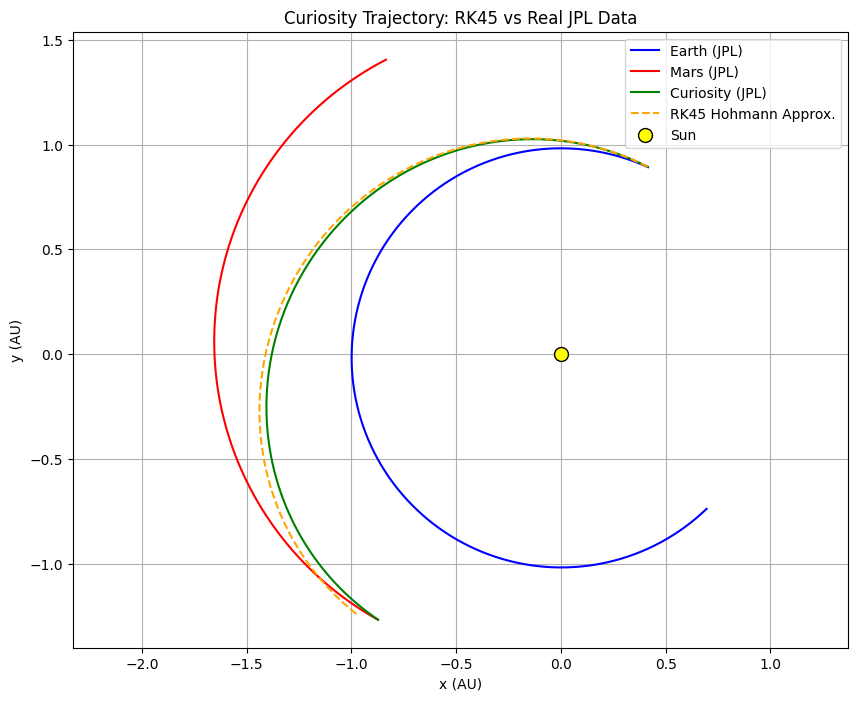

In [ ]:
from astroquery.jplhorizons import Horizons
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# --- Query JPL Horizons for Earth, Mars, and Curiosity --- #
start_date = '2011-11-27 16:00'  # Curiosity launch window (safe time)
end_date = '2012-08-06'
step = '1d'
epochs = {'start': start_date, 'stop': end_date, 'step': step}

# Query positions relative to Sun (500@0)
earth_ephem = Horizons(id='399', location='500@0', epochs=epochs).vectors()
mars_ephem = Horizons(id='499', location='500@0', epochs=epochs).vectors()
curiosity_ephem = Horizons(id='Mars Science Laboratory', location='500@0', epochs=epochs).vectors()

# Extract positions and velocities (at launch)
x0 = curiosity_ephem['x'][0]        # AU
y0 = curiosity_ephem['y'][0]
vx0 = curiosity_ephem['vx'][0]      # AU/day
vy0 = curiosity_ephem['vy'][0]

# Convert AU/day to m/s
AU = 1.496e11      # meters
DAY = 86400        # seconds
x0_m = x0 * AU
y0_m = y0 * AU
vx0_m = vx0 * AU / DAY
vy0_m = vy0 * AU / DAY

# --- Define RK45 simulation --- #
G = 6.67430e-11       # m^3 kg^-1 s^-2
M_sun = 1.989e30      # kg

def two_body(t, y):
    x, y_pos, vx, vy = y
    r = np.sqrt(x**2 + y_pos**2)
    ax = -G * M_sun * x / r**3
    ay = -G * M_sun * y_pos / r**3
    return [vx, vy, ax, ay]

# Initial state vector in SI units
y0_rk = [x0_m, y0_m, vx0_m, vy0_m]

# Time span (simulate full mission duration)
t0 = 0
tf = (curiosity_ephem['datetime_jd'][-1] - curiosity_ephem['datetime_jd'][0]) * DAY  # in seconds
t_eval = np.linspace(t0, tf, len(curiosity_ephem))  # match JPL sampling

# Integrate using RK45 (Dormand-Prince)
sol = solve_ivp(two_body, (t0, tf), y0_rk, method='RK45', t_eval=t_eval, rtol=1e-9, atol=1e-9)

# Convert RK45 output to AU
rk_x = sol.y[0] / AU
rk_y = sol.y[1] / AU

# Extract JPL trajectories
earth_x = np.array(earth_ephem['x'])
earth_y = np.array(earth_ephem['y'])

mars_x = np.array(mars_ephem['x'])
mars_y = np.array(mars_ephem['y'])

curiosity_x = np.array(curiosity_ephem['x'])
curiosity_y = np.array(curiosity_ephem['y'])

# --- Plot everything --- #
plt.figure(figsize=(10, 8))
plt.plot(earth_x, earth_y, label='Earth (JPL)', color='blue')
plt.plot(mars_x, mars_y, label='Mars (JPL)', color='red')
plt.plot(curiosity_x, curiosity_y, label='Curiosity (JPL)', color='green')
plt.plot(rk_x, rk_y, '--', label='RK45 Hohmann Approx.', color='orange')
plt.scatter(0, 0, color='yellow', s=100, edgecolors='black', label='Sun', zorder=5)

plt.title('Curiosity Trajectory: RK45 vs Real JPL Data')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

### Euclidean error (distance error) btwn simulated and real

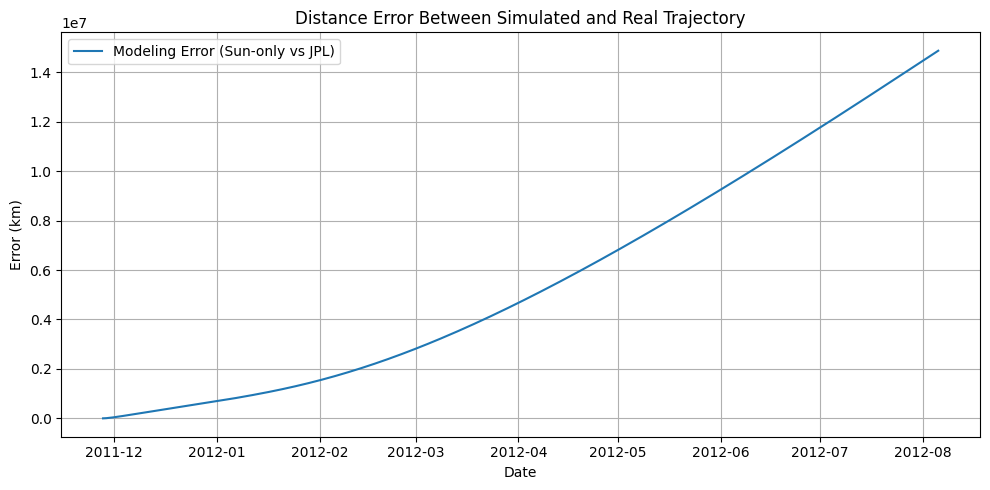

Max error: 14,874,898.96 km
Mean error: 5,688,930.70 km
Final error: 14,874,898.96 km


In [ ]:
# --- Step 6: Compute model error over time ---

# Convert Curiosity JPL positions to meters
curiosity_x_m = np.array(curiosity_ephem['x']) * AU
curiosity_y_m = np.array(curiosity_ephem['y']) * AU

# RK45 output already in meters from solve_ivp, convert from AU to meters:
rk_x_m = sol.y[0]
rk_y_m = sol.y[1]

# Compute Euclidean distance (error) at each time step
errors = np.sqrt((curiosity_x_m - rk_x_m)**2 + (curiosity_y_m - rk_y_m)**2)  # in meters

# Optional: convert to km
errors_km = errors / 1000

# --- Step 7: Plot error over time ---
import matplotlib.dates as mdates

dates = np.array(curiosity_ephem['datetime_jd'])  # Julian dates
from astropy.time import Time
times = Time(dates, format='jd').datetime  # Convert to datetime objects

plt.figure(figsize=(10, 5))
plt.plot(times, errors_km, label='Modeling Error (Sun-only vs JPL)')
plt.title('Distance Error Between Simulated and Real Trajectory')
plt.ylabel('Error (km)')
plt.xlabel('Date')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Optional: Print summary stats ---
print(f"Max error: {np.max(errors_km):,.2f} km")
print(f"Mean error: {np.mean(errors_km):,.2f} km")
print(f"Final error: {errors_km[-1]:,.2f} km")


### Adding Mars' gravity (doesn't do anything, can discuss why in report)

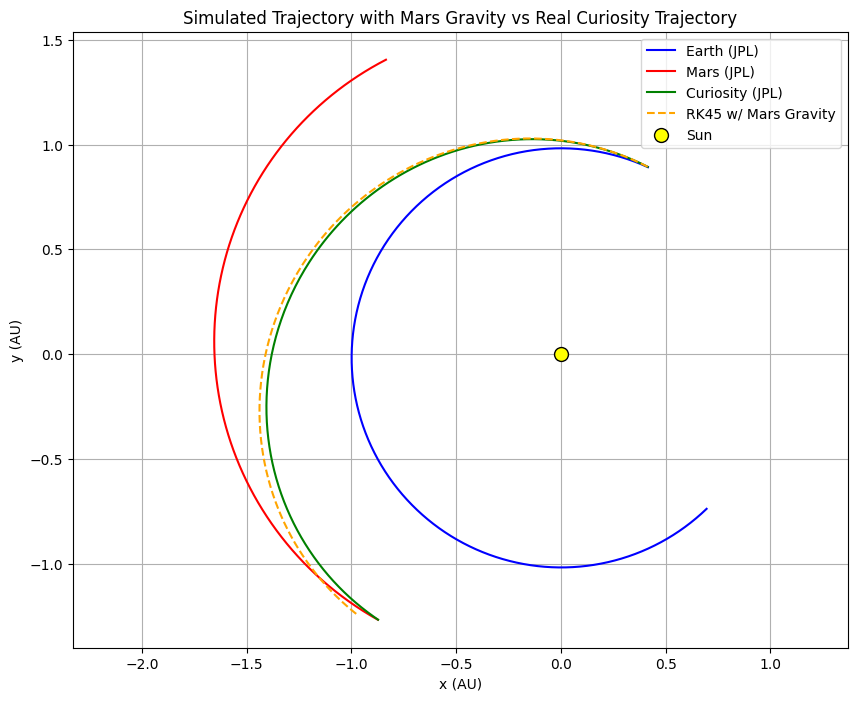

In [ ]:
from astroquery.jplhorizons import Horizons
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from astropy.time import Time

# --- Constants ---
G = 6.67430e-11       # m^3/kg/s^2
M_sun = 1.989e30      # kg
M_mars = 6.4171e23    # kg
AU = 1.496e11         # m
DAY = 86400           # s

# --- Time settings ---
start_date = '2011-11-27 16:00'
end_date = '2012-08-06'
step = '1d'
epochs = {'start': start_date, 'stop': end_date, 'step': step}

# --- JPL data for Earth, Mars, and Curiosity ---
earth_ephem = Horizons(id='399', location='500@0', epochs=epochs).vectors()
mars_ephem = Horizons(id='499', location='500@0', epochs=epochs).vectors()
curiosity_ephem = Horizons(id='Mars Science Laboratory', location='500@0', epochs=epochs).vectors()

# --- Extract positions ---
mars_x = np.array(mars_ephem['x']) * AU
mars_y = np.array(mars_ephem['y']) * AU

curiosity_x = np.array(curiosity_ephem['x']) * AU
curiosity_y = np.array(curiosity_ephem['y']) * AU
curiosity_vx = np.array(curiosity_ephem['vx']) * AU / DAY
curiosity_vy = np.array(curiosity_ephem['vy']) * AU / DAY

# Time in seconds from launch
t_days = np.array(curiosity_ephem['datetime_jd']) - curiosity_ephem['datetime_jd'][0]
t_sec = t_days * DAY

# Interpolators for Mars position
mars_x_interp = interp1d(t_sec, mars_x, kind='cubic', fill_value="extrapolate")
mars_y_interp = interp1d(t_sec, mars_y, kind='cubic', fill_value="extrapolate")

# --- Define the 3-body ODE (Sun + Mars) ---
def three_body_with_mars(t, y):
    x, y_pos, vx, vy = y
    r_sun = np.sqrt(x**2 + y_pos**2)

    # Mars position at time t
    mx = mars_x_interp(t)
    my = mars_y_interp(t)

    dx_mars = x - mx
    dy_mars = y_pos - my
    r_mars = np.sqrt(dx_mars**2 + dy_mars**2)

    # Gravitational accelerations
    ax_sun = -G * M_sun * x / r_sun**3
    ay_sun = -G * M_sun * y_pos / r_sun**3
    ax_mars = -G * M_mars * dx_mars / r_mars**3
    ay_mars = -G * M_mars * dy_mars / r_mars**3

    return [vx, vy, ax_sun + ax_mars, ay_sun + ay_mars]

# --- Initial conditions from Curiosity launch ---
x0 = curiosity_x[0]
y0 = curiosity_y[0]
vx0 = curiosity_vx[0]
vy0 = curiosity_vy[0]
y0_vec = [x0, y0, vx0, vy0]

# --- Run RK45 with Mars gravity included ---
t0 = 0
tf = t_sec[-1]
t_eval = t_sec

sol = solve_ivp(three_body_with_mars, (t0, tf), y0_vec, t_eval=t_eval, method='RK45', rtol=1e-9, atol=1e-9)
rk_x = sol.y[0] / AU
rk_y = sol.y[1] / AU

# --- Convert JPL positions for plotting ---
earth_x = np.array(earth_ephem['x'])
earth_y = np.array(earth_ephem['y'])
mars_x_plot = mars_x / AU
mars_y_plot = mars_y / AU
curiosity_x_plot = curiosity_x / AU
curiosity_y_plot = curiosity_y / AU

# --- Plot ---
plt.figure(figsize=(10, 8))
plt.plot(earth_x, earth_y, label='Earth (JPL)', color='blue')
plt.plot(mars_x_plot, mars_y_plot, label='Mars (JPL)', color='red')
plt.plot(curiosity_x_plot, curiosity_y_plot, label='Curiosity (JPL)', color='green')
plt.plot(rk_x, rk_y, '--', label='RK45 w/ Mars Gravity', color='orange')
plt.scatter(0, 0, color='yellow', s=100, edgecolors='black', label='Sun', zorder=5)

plt.title('Simulated Trajectory with Mars Gravity vs Real Curiosity Trajectory')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

### Euclidean error, notice: worse than Hohmann transfer

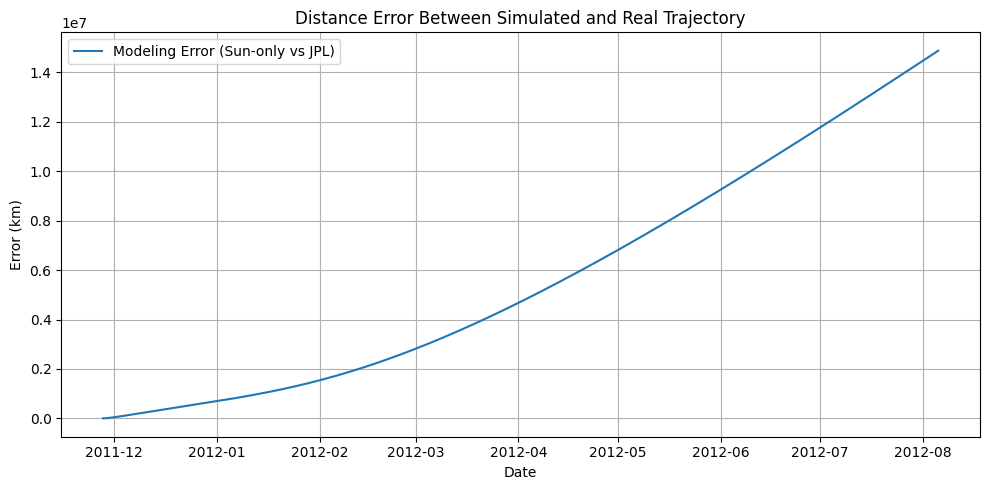

Max error: 14,878,046.95 km
Mean error: 5,689,602.38 km
Final error: 14,878,046.95 km


In [ ]:
# --- Step 6: Compute model error over time ---

# Convert Curiosity JPL positions to meters
curiosity_x_m = np.array(curiosity_ephem['x']) * AU
curiosity_y_m = np.array(curiosity_ephem['y']) * AU

# RK45 output already in meters from solve_ivp, convert from AU to meters:
rk_x_m = sol.y[0]
rk_y_m = sol.y[1]

# Compute Euclidean distance (error) at each time step
errors = np.sqrt((curiosity_x_m - rk_x_m)**2 + (curiosity_y_m - rk_y_m)**2)  # in meters

# Optional: convert to km
errors_km = errors / 1000

# --- Step 7: Plot error over time ---
import matplotlib.dates as mdates

dates = np.array(curiosity_ephem['datetime_jd'])  # Julian dates
from astropy.time import Time
times = Time(dates, format='jd').datetime  # Convert to datetime objects

plt.figure(figsize=(10, 5))
plt.plot(times, errors_km, label='Modeling Error (Sun-only vs JPL)')
plt.title('Distance Error Between Simulated and Real Trajectory')
plt.ylabel('Error (km)')
plt.xlabel('Date')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Optional: Print summary stats ---
print(f"Max error: {np.max(errors_km):,.2f} km")
print(f"Mean error: {np.mean(errors_km):,.2f} km")
print(f"Final error: {errors_km[-1]:,.2f} km")


### SKIPPING OPTIMIZER STUFF FOR NOW, UNDERMINES THE REST OF THE CALCULATIONS

### Now Earth and Sun gravity, no Mars gravity

#### Note that the initial condition has been changed so the spacecraft can escape Earth's gravity

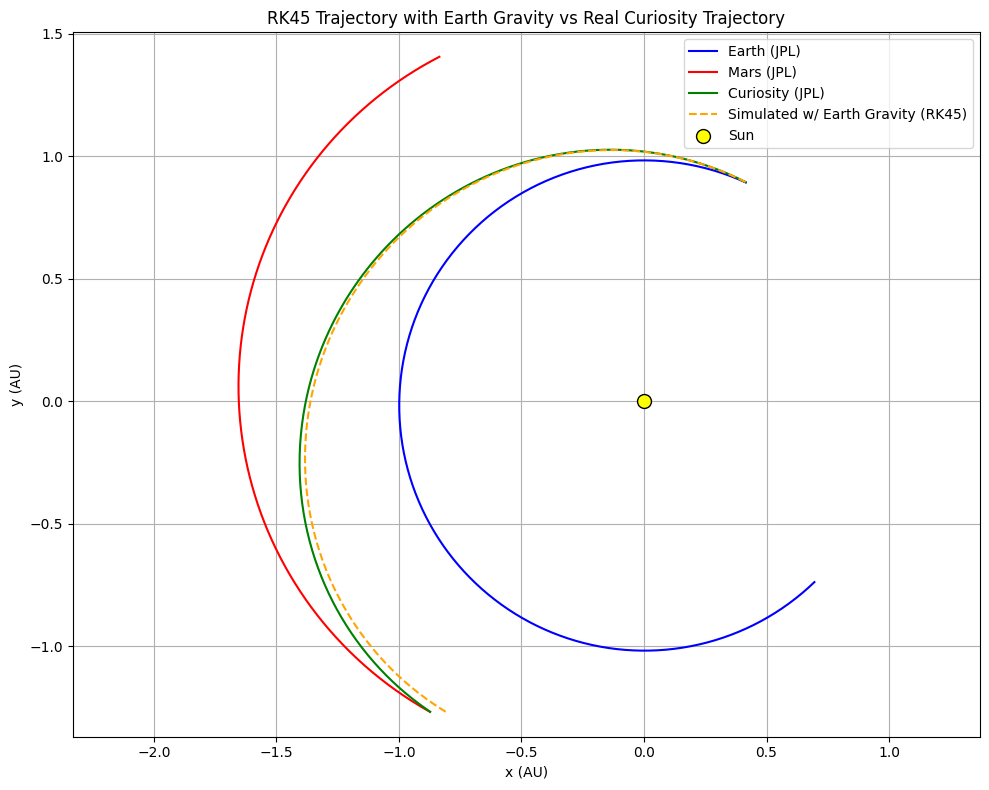

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from astroquery.jplhorizons import Horizons
from astropy.time import Time

# --- Constants ---
G = 6.67430e-11       # m^3/kg/s^2
M_sun = 1.989e30      # kg
M_earth = 5.972e24    # kg
AU = 1.496e11         # m
DAY = 86400           # s

# --- Updated start date: when Curiosity escapes Earth's gravity ---
start_date = '2011-11-27 16:00'
end_date = '2012-08-06'
step = '1d'
epochs = {'start': start_date, 'stop': end_date, 'step': step}

# --- Query JPL data ---
earth_ephem = Horizons(id='399', location='500@0', epochs=epochs).vectors()
mars_ephem = Horizons(id='499', location='500@0', epochs=epochs).vectors()
curiosity_ephem = Horizons(id='Mars Science Laboratory', location='500@0', epochs=epochs).vectors()

# --- Time handling ---
t_days = np.array(curiosity_ephem['datetime_jd']) - curiosity_ephem['datetime_jd'][0]
t_sec = t_days * DAY
dates = Time(curiosity_ephem['datetime_jd'], format='jd').datetime

# --- Interpolate Earth's position ---
earth_x = np.array(earth_ephem['x']) * AU
earth_y = np.array(earth_ephem['y']) * AU
earth_x_interp = interp1d(t_sec, earth_x, kind='cubic', fill_value='extrapolate')
earth_y_interp = interp1d(t_sec, earth_y, kind='cubic', fill_value='extrapolate')

# --- ODE with Sun and Earth gravity ---
def three_body_sun_earth(t, y):
    x, y_pos, vx, vy = y
    r_sun = np.sqrt(x**2 + y_pos**2)
    ex = earth_x_interp(t)
    ey = earth_y_interp(t)
    dx_e = x - ex
    dy_e = y_pos - ey
    r_e = np.sqrt(dx_e**2 + dy_e**2)

    ax_sun = -G * M_sun * x / r_sun**3
    ay_sun = -G * M_sun * y_pos / r_sun**3
    ax_e = -G * M_earth * dx_e / r_e**3
    ay_e = -G * M_earth * dy_e / r_e**3

    return [vx, vy, ax_sun + ax_e, ay_sun + ay_e]

# --- Initial conditions (Curiosity on Nov 27, 2011 at 16:00) ---
x0 = curiosity_ephem['x'][0] * AU
y0 = curiosity_ephem['y'][0] * AU
vx0 = curiosity_ephem['vx'][0] * AU / DAY
vy0 = curiosity_ephem['vy'][0] * AU / DAY
y0_vec = [x0, y0, vx0, vy0]

# --- Run RK45 ---
sol = solve_ivp(
    three_body_sun_earth,
    (0, t_sec[-1]),
    y0_vec,
    t_eval=t_sec,
    method='RK45',
    rtol=1e-9,
    atol=1e-9
)

rk_x = sol.y[0] / AU
rk_y = sol.y[1] / AU

# --- JPL trajectories (for plotting) ---
curiosity_x = np.array(curiosity_ephem['x'])
curiosity_y = np.array(curiosity_ephem['y'])

earth_x_plot = np.array(earth_ephem['x'])
earth_y_plot = np.array(earth_ephem['y'])

mars_x_plot = np.array(mars_ephem['x'])
mars_y_plot = np.array(mars_ephem['y'])

# --- Plot everything ---
plt.figure(figsize=(10, 8))
plt.plot(earth_x_plot, earth_y_plot, label='Earth (JPL)', color='blue')
plt.plot(mars_x_plot, mars_y_plot, label='Mars (JPL)', color='red')
plt.plot(curiosity_x, curiosity_y, label='Curiosity (JPL)', color='green')
plt.plot(rk_x, rk_y, '--', label='Simulated w/ Earth Gravity (RK45)', color='orange')
plt.scatter(0, 0, color='yellow', s=100, edgecolors='black', label='Sun', zorder=5)

plt.title('RK45 Trajectory with Earth Gravity vs Real Curiosity Trajectory')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Euclidean error, relatively good

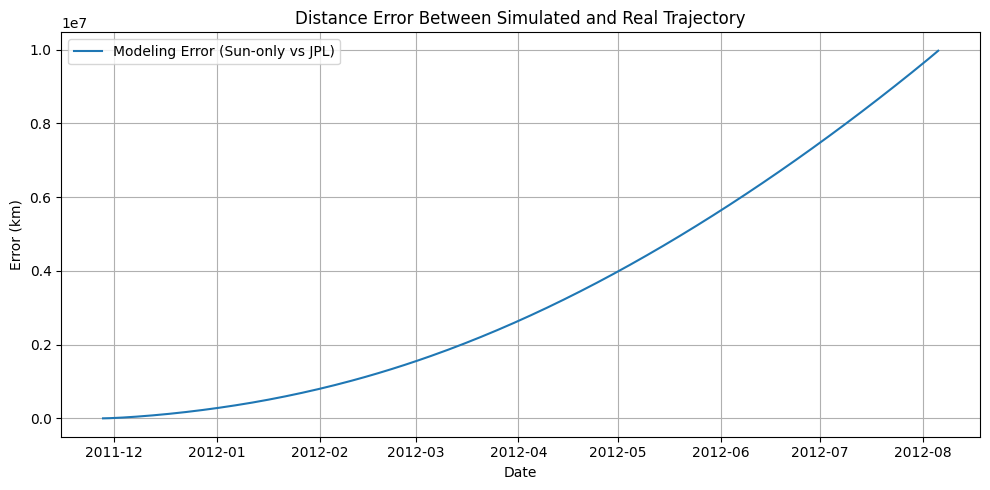

Max error: 9,971,261.16 km
Mean error: 3,461,510.31 km
Final error: 9,971,261.16 km


In [ ]:
# --- Step 6: Compute model error over time ---

# Convert Curiosity JPL positions to meters
curiosity_x_m = np.array(curiosity_ephem['x']) * AU
curiosity_y_m = np.array(curiosity_ephem['y']) * AU

# RK45 output already in meters from solve_ivp, convert from AU to meters:
rk_x_m = sol.y[0]
rk_y_m = sol.y[1]

# Compute Euclidean distance (error) at each time step
errors = np.sqrt((curiosity_x_m - rk_x_m)**2 + (curiosity_y_m - rk_y_m)**2)  # in meters

# Optional: convert to km
errors_km = errors / 1000

# --- Step 7: Plot error over time ---
import matplotlib.dates as mdates

dates = np.array(curiosity_ephem['datetime_jd'])  # Julian dates
from astropy.time import Time
times = Time(dates, format='jd').datetime  # Convert to datetime objects

plt.figure(figsize=(10, 5))
plt.plot(times, errors_km, label='Modeling Error (Sun-only vs JPL)')
plt.title('Distance Error Between Simulated and Real Trajectory')
plt.ylabel('Error (km)')
plt.xlabel('Date')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Optional: Print summary stats ---
print(f"Max error: {np.max(errors_km):,.2f} km")
print(f"Mean error: {np.mean(errors_km):,.2f} km")
print(f"Final error: {errors_km[-1]:,.2f} km")

### Earth, Mars, and Sun gravity considered

#### Note: Mars' effect on the trajectory is negligible, plot looks almost exactly like just Earth and Sun

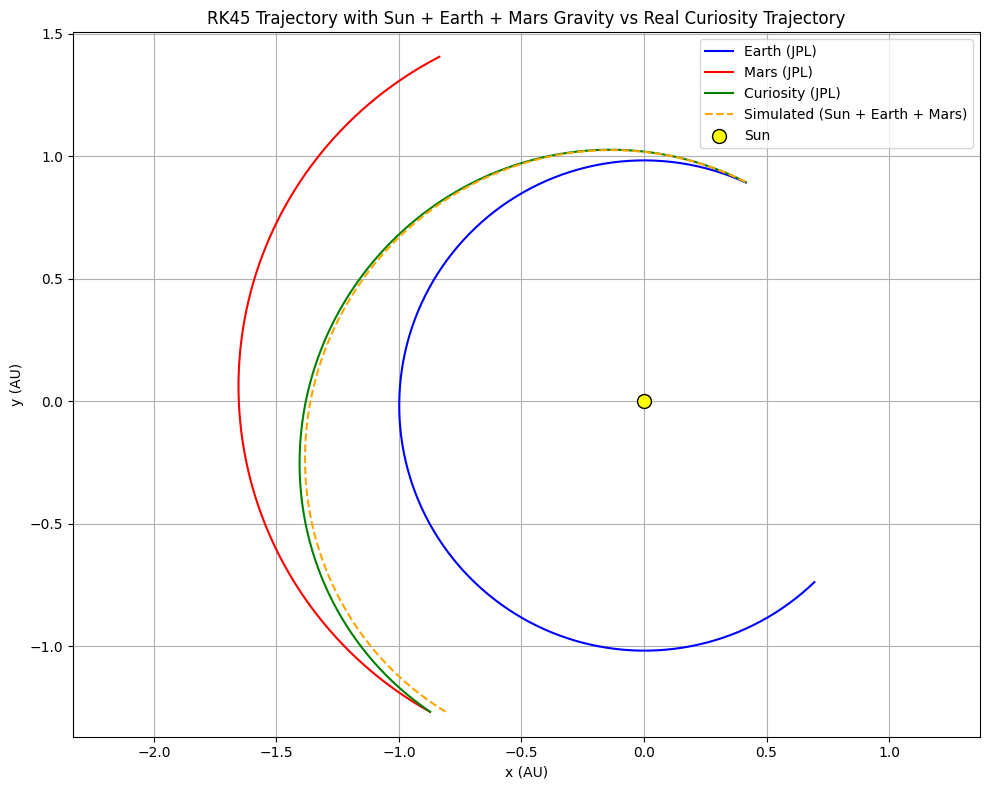

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from astroquery.jplhorizons import Horizons
from astropy.time import Time

# --- Constants ---
G = 6.67430e-11       # m^3/kg/s^2
M_sun = 1.989e30      # kg
M_earth = 5.972e24    # kg
M_mars = 6.4171e23    # kg
AU = 1.496e11         # m
DAY = 86400           # s

# --- Time setup ---
start_date = '2011-11-27 16:00'
end_date = '2012-08-06'
step = '1d'
epochs = {'start': start_date, 'stop': end_date, 'step': step}

# --- JPL ephemerides ---
earth_ephem = Horizons(id='399', location='500@0', epochs=epochs).vectors()
mars_ephem = Horizons(id='499', location='500@0', epochs=epochs).vectors()
curiosity_ephem = Horizons(id='Mars Science Laboratory', location='500@0', epochs=epochs).vectors()

# --- Time array (in seconds from launch) ---
t_days = np.array(curiosity_ephem['datetime_jd']) - curiosity_ephem['datetime_jd'][0]
t_sec = t_days * DAY
dates = Time(curiosity_ephem['datetime_jd'], format='jd').datetime

# --- Interpolators for Earth and Mars positions ---
earth_x = np.array(earth_ephem['x']) * AU
earth_y = np.array(earth_ephem['y']) * AU
mars_x = np.array(mars_ephem['x']) * AU
mars_y = np.array(mars_ephem['y']) * AU

earth_x_interp = interp1d(t_sec, earth_x, kind='cubic', fill_value='extrapolate')
earth_y_interp = interp1d(t_sec, earth_y, kind='cubic', fill_value='extrapolate')
mars_x_interp = interp1d(t_sec, mars_x, kind='cubic', fill_value='extrapolate')
mars_y_interp = interp1d(t_sec, mars_y, kind='cubic', fill_value='extrapolate')

# --- 3-body ODE system (Sun + Earth + Mars) ---
def three_body_sun_earth_mars(t, y):
    x, y_pos, vx, vy = y
    r_sun = np.sqrt(x**2 + y_pos**2)

    # Earth position at time t
    ex = earth_x_interp(t)
    ey = earth_y_interp(t)
    dx_e = x - ex
    dy_e = y_pos - ey
    r_e = np.sqrt(dx_e**2 + dy_e**2)

    # Mars position at time t
    mx = mars_x_interp(t)
    my = mars_y_interp(t)
    dx_m = x - mx
    dy_m = y_pos - my
    r_m = np.sqrt(dx_m**2 + dy_m**2)

    # Gravitational accelerations
    ax_sun = -G * M_sun * x / r_sun**3
    ay_sun = -G * M_sun * y_pos / r_sun**3
    ax_earth = -G * M_earth * dx_e / r_e**3
    ay_earth = -G * M_earth * dy_e / r_e**3
    ax_mars = -G * M_mars * dx_m / r_m**3
    ay_mars = -G * M_mars * dy_m / r_m**3

    return [vx, vy, ax_sun + ax_earth + ax_mars, ay_sun + ay_earth + ay_mars]

# --- Initial conditions (Curiosity on Nov 27, 2011 at 16:00) ---
x0 = curiosity_ephem['x'][0] * AU
y0 = curiosity_ephem['y'][0] * AU
vx0 = curiosity_ephem['vx'][0] * AU / DAY
vy0 = curiosity_ephem['vy'][0] * AU / DAY
y0_vec = [x0, y0, vx0, vy0]

# --- RK45 Integration ---
sol = solve_ivp(
    three_body_sun_earth_mars,
    (0, t_sec[-1]),
    y0_vec,
    t_eval=t_sec,
    method='RK45',
    rtol=1e-9,
    atol=1e-9
)

rk_x = sol.y[0] / AU
rk_y = sol.y[1] / AU

# --- JPL trajectory data ---
curiosity_x = np.array(curiosity_ephem['x'])
curiosity_y = np.array(curiosity_ephem['y'])
earth_x_plot = np.array(earth_ephem['x'])
earth_y_plot = np.array(earth_ephem['y'])
mars_x_plot = np.array(mars_ephem['x'])
mars_y_plot = np.array(mars_ephem['y'])

# --- Plot ---
plt.figure(figsize=(10, 8))
plt.plot(earth_x_plot, earth_y_plot, label='Earth (JPL)', color='blue')
plt.plot(mars_x_plot, mars_y_plot, label='Mars (JPL)', color='red')
plt.plot(curiosity_x, curiosity_y, label='Curiosity (JPL)', color='green')
plt.plot(rk_x, rk_y, '--', label='Simulated (Sun + Earth + Mars)', color='orange')
plt.scatter(0, 0, color='yellow', s=100, edgecolors='black', label='Sun', zorder=5)

plt.title('RK45 Trajectory with Sun + Earth + Mars Gravity vs Real Curiosity Trajectory')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Euclidean error, got a little better

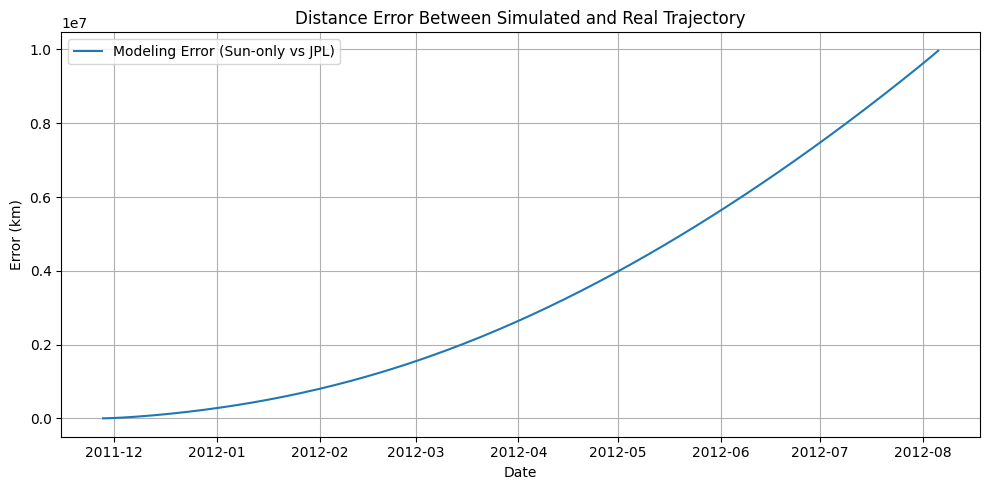

Max error: 9,965,923.74 km
Mean error: 3,460,686.50 km
Final error: 9,965,923.74 km


In [ ]:
# --- Step 6: Compute model error over time ---

# Convert Curiosity JPL positions to meters
curiosity_x_m = np.array(curiosity_ephem['x']) * AU
curiosity_y_m = np.array(curiosity_ephem['y']) * AU

# RK45 output already in meters from solve_ivp, convert from AU to meters:
rk_x_m = sol.y[0]
rk_y_m = sol.y[1]

# Compute Euclidean distance (error) at each time step
errors = np.sqrt((curiosity_x_m - rk_x_m)**2 + (curiosity_y_m - rk_y_m)**2)  # in meters

# Optional: convert to km
errors_km = errors / 1000

# --- Step 7: Plot error over time ---
import matplotlib.dates as mdates

dates = np.array(curiosity_ephem['datetime_jd'])  # Julian dates
from astropy.time import Time
times = Time(dates, format='jd').datetime  # Convert to datetime objects

plt.figure(figsize=(10, 5))
plt.plot(times, errors_km, label='Modeling Error (Sun-only vs JPL)')
plt.title('Distance Error Between Simulated and Real Trajectory')
plt.ylabel('Error (km)')
plt.xlabel('Date')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Optional: Print summary stats ---
print(f"Max error: {np.max(errors_km):,.2f} km")
print(f"Mean error: {np.mean(errors_km):,.2f} km")
print(f"Final error: {errors_km[-1]:,.2f} km")


### Adding Trajectory Correction Maneuvers (TCMs)

#### Curiosity had 6 TCMs during its journey, simulated TCMs synced up with the timing for Curiosity

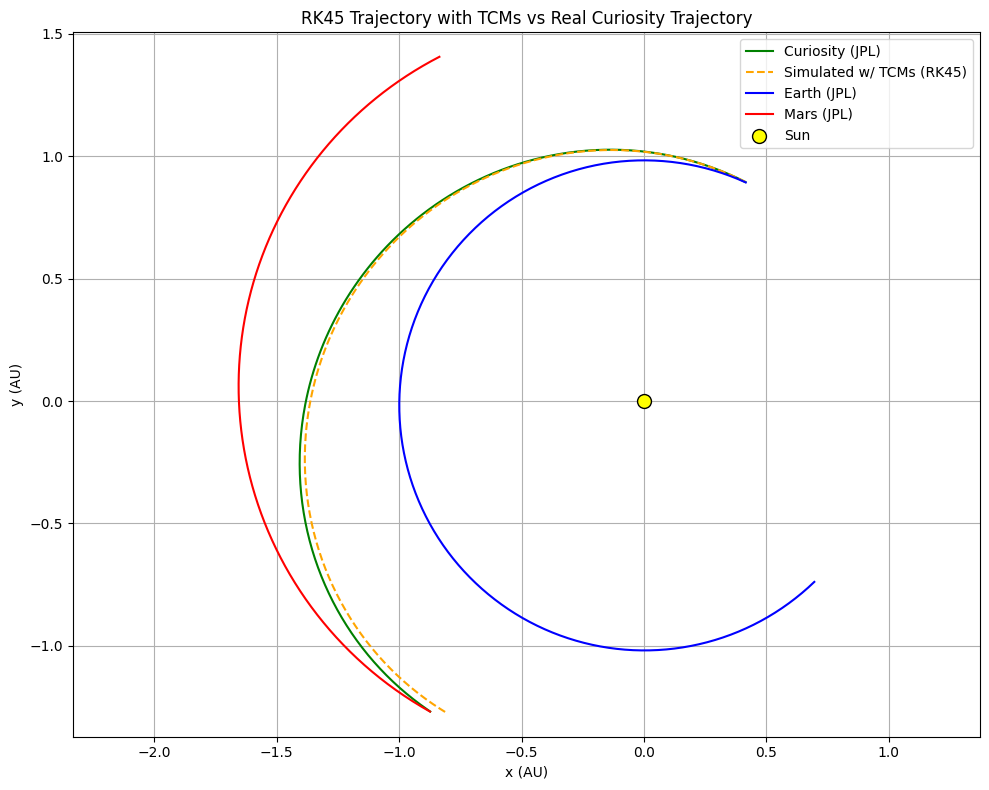

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from astroquery.jplhorizons import Horizons
from astropy.time import Time

# --- Constants ---
G = 6.67430e-11       # m^3/kg/s^2
M_sun = 1.989e30      # kg
M_earth = 5.972e24    # kg
M_mars = 6.4171e23    # kg
AU = 1.496e11         # m
DAY = 86400           # s

# --- Ephemeris query setup ---
start_date = '2011-11-27 16:00'
end_date = '2012-08-06'
step = '1d'
epochs = {'start': start_date, 'stop': end_date, 'step': step}

earth_ephem = Horizons(id='399', location='500@0', epochs=epochs).vectors()
mars_ephem = Horizons(id='499', location='500@0', epochs=epochs).vectors()
curiosity_ephem = Horizons(id='Mars Science Laboratory', location='500@0', epochs=epochs).vectors()

# --- Time handling ---
t_days = np.array(curiosity_ephem['datetime_jd']) - curiosity_ephem['datetime_jd'][0]
t_sec = t_days * DAY
dates = Time(curiosity_ephem['datetime_jd'], format='jd').datetime

# --- Interpolators for Earth and Mars ---
earth_x_interp = interp1d(t_sec, np.array(earth_ephem['x']) * AU, kind='cubic', fill_value='extrapolate')
earth_y_interp = interp1d(t_sec, np.array(earth_ephem['y']) * AU, kind='cubic', fill_value='extrapolate')
mars_x_interp = interp1d(t_sec, np.array(mars_ephem['x']) * AU, kind='cubic', fill_value='extrapolate')
mars_y_interp = interp1d(t_sec, np.array(mars_ephem['y']) * AU, kind='cubic', fill_value='extrapolate')

# --- ODE system: Sun + Earth + Mars gravity ---
def three_body_sun_earth_mars(t, y):
    x, y_pos, vx, vy = y

    # Distances
    r_sun = np.sqrt(x**2 + y_pos**2)
    ex, ey = earth_x_interp(t), earth_y_interp(t)
    dx_e, dy_e = x - ex, y_pos - ey
    r_e = np.sqrt(dx_e**2 + dy_e**2)
    mx, my = mars_x_interp(t), mars_y_interp(t)
    dx_m, dy_m = x - mx, y_pos - my
    r_m = np.sqrt(dx_m**2 + dy_m**2)

    # Accelerations
    ax = (-G * M_sun * x / r_sun**3) + (-G * M_earth * dx_e / r_e**3) + (-G * M_mars * dx_m / r_m**3)
    ay = (-G * M_sun * y_pos / r_sun**3) + (-G * M_earth * dy_e / r_e**3) + (-G * M_mars * dy_m / r_m**3)

    return [vx, vy, ax, ay]

# --- Initial state from Curiosity's real data ---
x0 = curiosity_ephem['x'][0] * AU
y0 = curiosity_ephem['y'][0] * AU
vx0 = curiosity_ephem['vx'][0] * AU / DAY
vy0 = curiosity_ephem['vy'][0] * AU / DAY
state = [x0, y0, vx0, vy0]

# --- TCM timestamps (days after launch) ---
tcm_days = [14, 45, 119, 170, 212, 243]
tcm_seconds = [d * DAY for d in tcm_days]
delta_v_magnitude = 5  # m/s ∆v in direction of travel

# --- Split simulation across TCMs ---
t_segments = [0] + tcm_seconds + [t_sec[-1]]
trajectory_x = []
trajectory_y = []

for i in range(len(t_segments) - 1):
    t0, tf = t_segments[i], t_segments[i+1]
    t_eval = t_sec[(t_sec >= t0) & (t_sec <= tf)]

    sol = solve_ivp(three_body_sun_earth_mars, (t0, tf), state, t_eval=t_eval, method='RK45', rtol=1e-9, atol=1e-9)
    trajectory_x.extend(sol.y[0])
    trajectory_y.extend(sol.y[1])

    if i < len(tcm_seconds):  # apply TCM at the end of the segment
        vx, vy = sol.y[2, -1], sol.y[3, -1]
        v_mag = np.sqrt(vx**2 + vy**2)
        vx += delta_v_magnitude * vx / v_mag
        vy += delta_v_magnitude * vy / v_mag
        state = [sol.y[0, -1], sol.y[1, -1], vx, vy]

# --- Convert simulated to AU for plotting ---
rk_x_au = np.array(trajectory_x) / AU
rk_y_au = np.array(trajectory_y) / AU
curiosity_x = np.array(curiosity_ephem['x'])
curiosity_y = np.array(curiosity_ephem['y'])
earth_x = np.array(earth_ephem['x'])
earth_y = np.array(earth_ephem['y'])
mars_x = np.array(mars_ephem['x'])
mars_y = np.array(mars_ephem['y'])

# --- Plot ---
plt.figure(figsize=(10, 8))
plt.plot(curiosity_x, curiosity_y, label='Curiosity (JPL)', color='green')
plt.plot(rk_x_au, rk_y_au, '--', label='Simulated w/ TCMs (RK45)', color='orange')
plt.plot(earth_x, earth_y, label='Earth (JPL)', color='blue')
plt.plot(mars_x, mars_y, label='Mars (JPL)', color='red')
plt.scatter(0, 0, color='yellow', s=100, edgecolors='black', label='Sun', zorder=5)

plt.title('RK45 Trajectory with TCMs vs Real Curiosity Trajectory')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Euclidean error, final error reduced (lowest I have calculated)

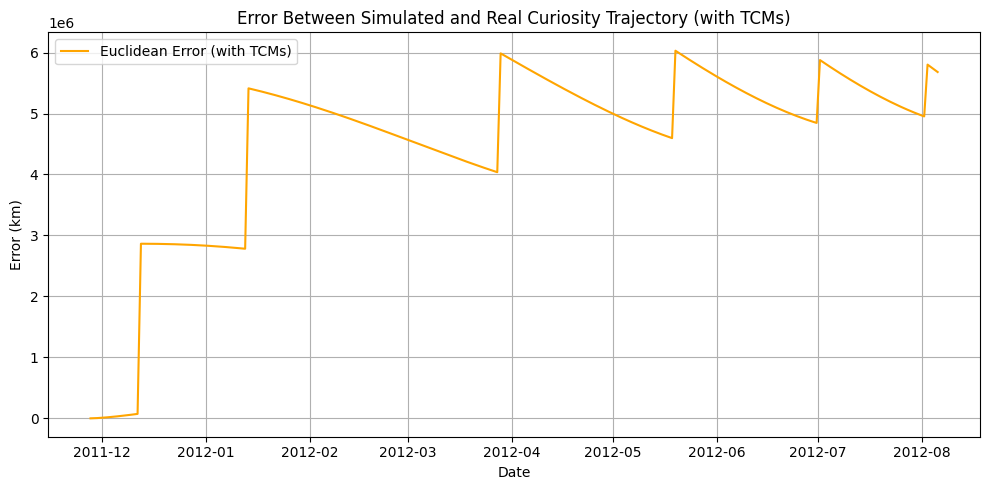

Max error:   6,029,946.14 km
Mean error:  4,531,845.00 km
Final error: 5,680,223.29 km


In [ ]:
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt
from astroquery.jplhorizons import Horizons

# Constants
AU = 1.496e11
DAY = 86400

# Re-query JPL Curiosity ephemeris
epochs = {'start': '2011-11-27 16:00', 'stop': '2012-08-06', 'step': '1d'}
curiosity_ephem = Horizons(id='Mars Science Laboratory', location='500@0', epochs=epochs).vectors()

# Time axis
dates = Time(curiosity_ephem['datetime_jd'], format='jd').datetime

# Convert JPL trajectory to meters
curiosity_x_m = np.array(curiosity_ephem['x']) * AU
curiosity_y_m = np.array(curiosity_ephem['y']) * AU

# Simulated trajectory with TCMs (already in meters)
rk_x_m = np.array(trajectory_x)
rk_y_m = np.array(trajectory_y)

# Trim arrays to match lengths
min_len = min(len(curiosity_x_m), len(rk_x_m))
curiosity_x_m = curiosity_x_m[:min_len]
curiosity_y_m = curiosity_y_m[:min_len]
rk_x_m = rk_x_m[:min_len]
rk_y_m = rk_y_m[:min_len]
dates_trimmed = dates[:min_len]

# Compute Euclidean distance error
errors_m = np.sqrt((rk_x_m - curiosity_x_m)**2 + (rk_y_m - curiosity_y_m)**2)
errors_km = errors_m / 1000

# Plot error
plt.figure(figsize=(10, 5))
plt.plot(dates_trimmed, errors_km, label='Euclidean Error (with TCMs)', color='orange')
plt.title('Error Between Simulated and Real Curiosity Trajectory (with TCMs)')
plt.xlabel('Date')
plt.ylabel('Error (km)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Summary statistics
print(f"Max error:   {np.max(errors_km):,.2f} km")
print(f"Mean error:  {np.mean(errors_km):,.2f} km")
print(f"Final error: {errors_km[-1]:,.2f} km")


### Optimized TCMs

Optimized ∆v values for first 5 TCMs (m/s): [  0.   0. 100. 100. 100.]


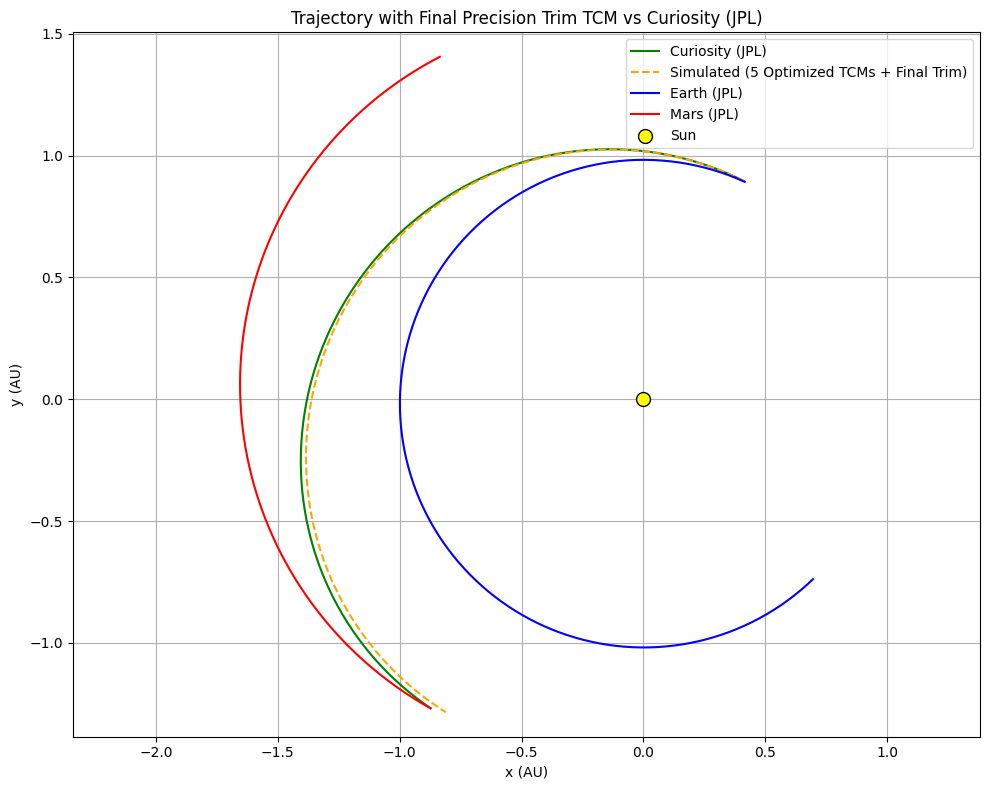

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.optimize import minimize
from astroquery.jplhorizons import Horizons
from astropy.time import Time

# --- Constants ---
G = 6.67430e-11
M_sun = 1.989e30
M_earth = 5.972e24
M_mars = 6.4171e23
AU = 1.496e11
DAY = 86400

# --- Time and ephemeris setup ---
start_date = '2011-11-27 16:00'
end_date = '2012-08-06'
epochs = {'start': start_date, 'stop': end_date, 'step': '1d'}

earth_ephem = Horizons(id='399', location='500@0', epochs=epochs).vectors()
mars_ephem = Horizons(id='499', location='500@0', epochs=epochs).vectors()
curiosity_ephem = Horizons(id='Mars Science Laboratory', location='500@0', epochs=epochs).vectors()

# Time array
t_days = np.array(curiosity_ephem['datetime_jd']) - curiosity_ephem['datetime_jd'][0]
t_sec = t_days * DAY
dates = Time(curiosity_ephem['datetime_jd'], format='jd').datetime

# Interpolators
earth_x = interp1d(t_sec, earth_ephem['x'] * AU, kind='cubic', fill_value='extrapolate')
earth_y = interp1d(t_sec, earth_ephem['y'] * AU, kind='cubic', fill_value='extrapolate')
mars_x = interp1d(t_sec, mars_ephem['x'] * AU, kind='cubic', fill_value='extrapolate')
mars_y = interp1d(t_sec, mars_ephem['y'] * AU, kind='cubic', fill_value='extrapolate')

# ODE system
def three_body(t, y):
    x, y_pos, vx, vy = y
    r_sun = np.sqrt(x**2 + y_pos**2)
    ex, ey = earth_x(t), earth_y(t)
    dx_e, dy_e = x - ex, y_pos - ey
    r_e = np.sqrt(dx_e**2 + dy_e**2)
    mx, my = mars_x(t), mars_y(t)
    dx_m, dy_m = x - mx, y_pos - my
    r_m = np.sqrt(dx_m**2 + dy_m**2)
    ax = (-G * M_sun * x / r_sun**3) + (-G * M_earth * dx_e / r_e**3) + (-G * M_mars * dx_m / r_m**3)
    ay = (-G * M_sun * y_pos / r_sun**3) + (-G * M_earth * dy_e / r_e**3) + (-G * M_mars * dy_m / r_m**3)
    return [vx, vy, ax, ay]

# Initial state from JPL
x0 = curiosity_ephem['x'][0] * AU
y0 = curiosity_ephem['y'][0] * AU
vx0 = curiosity_ephem['vx'][0] * AU / DAY
vy0 = curiosity_ephem['vy'][0] * AU / DAY
initial_state = [x0, y0, vx0, vy0]

# TCM schedule
tcm_days = [14, 45, 119, 170, 212, 243]
tcm_sec = [d * DAY for d in tcm_days]
t_segments = [0] + tcm_sec + [t_sec[-1]]

# --- Objective: optimize first 5 burns only ---
def objective(dvs):
    state = initial_state.copy()
    for i in range(len(dvs)):
        t0, tf = t_segments[i], t_segments[i+1]
        sol = solve_ivp(three_body, (t0, tf), state, method='RK45', rtol=1e-9, atol=1e-9)
        x, y = sol.y[0, -1], sol.y[1, -1]
        vx, vy = sol.y[2, -1], sol.y[3, -1]
        v_mag = np.sqrt(vx**2 + vy**2)
        vx += dvs[i] * vx / v_mag
        vy += dvs[i] * vy / v_mag
        state = [x, y, vx, vy]

    # Simulate until final TCM time
    t0, tf = t_segments[-2], t_segments[-1]
    sol = solve_ivp(three_body, (t0, tf), state, method='RK45', rtol=1e-9, atol=1e-9)
    state = sol.y[:, -1]

    # Final position
    final_x, final_y = state[0], state[1]
    real_x = curiosity_ephem['x'][-1] * AU
    real_y = curiosity_ephem['y'][-1] * AU
    return np.sqrt((final_x - real_x)**2 + (final_y - real_y)**2)

# Optimize only first 5 burns
initial_guess = [5.0] * 5
bounds = [(0, 100)] * 5
result = minimize(objective, initial_guess, bounds=bounds, method='L-BFGS-B')
optimized_dvs = result.x
print("Optimized ∆v values for first 5 TCMs (m/s):", optimized_dvs)

# --- Full trajectory with precision trim at final TCM ---
state = initial_state.copy()
trajectory_x = []
trajectory_y = []

for i in range(len(t_segments) - 1):
    t0, tf = t_segments[i], t_segments[i+1]
    t_eval = t_sec[(t_sec >= t0) & (t_sec <= tf)]
    sol = solve_ivp(three_body, (t0, tf), state, t_eval=t_eval, method='RK45', rtol=1e-9, atol=1e-9)
    trajectory_x.extend(sol.y[0])
    trajectory_y.extend(sol.y[1])

    if i < len(optimized_dvs):  # optimized burns
        x, y = sol.y[0, -1], sol.y[1, -1]
        vx, vy = sol.y[2, -1], sol.y[3, -1]
        v_mag = np.sqrt(vx**2 + vy**2)
        vx += optimized_dvs[i] * vx / v_mag
        vy += optimized_dvs[i] * vy / v_mag
        state = [x, y, vx, vy]

    elif i == len(optimized_dvs):  # precision trim
        x, y = sol.y[0, -1], sol.y[1, -1]
        vx, vy = sol.y[2, -1], sol.y[3, -1]
        v_mag = np.sqrt(vx**2 + vy**2)
        final_x_target = curiosity_ephem['x'][-1] * AU
        final_y_target = curiosity_ephem['y'][-1] * AU
        dx = final_x_target - x
        dy = final_y_target - y
        dist = np.sqrt(dx**2 + dy**2)
        precision_dv = min(100, dist * 1e-5)  # scaled dv
        vx += precision_dv * dx / dist
        vy += precision_dv * dy / dist
        state = [x, y, vx, vy]

# --- Plot ---
rk_x_au = np.array(trajectory_x) / AU
rk_y_au = np.array(trajectory_y) / AU
curiosity_x = np.array(curiosity_ephem['x'])
curiosity_y = np.array(curiosity_ephem['y'])

plt.figure(figsize=(10, 8))
plt.plot(curiosity_x, curiosity_y, label='Curiosity (JPL)', color='green')
plt.plot(rk_x_au, rk_y_au, '--', label='Simulated (5 Optimized TCMs + Final Trim)', color='orange')
plt.plot(earth_ephem['x'], earth_ephem['y'], label='Earth (JPL)', color='blue')
plt.plot(mars_ephem['x'], mars_ephem['y'], label='Mars (JPL)', color='red')
plt.scatter(0, 0, color='yellow', s=100, edgecolors='black', label='Sun', zorder=5)

plt.title('Trajectory with Final Precision Trim TCM vs Curiosity (JPL)')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Final/Best Error Calculation

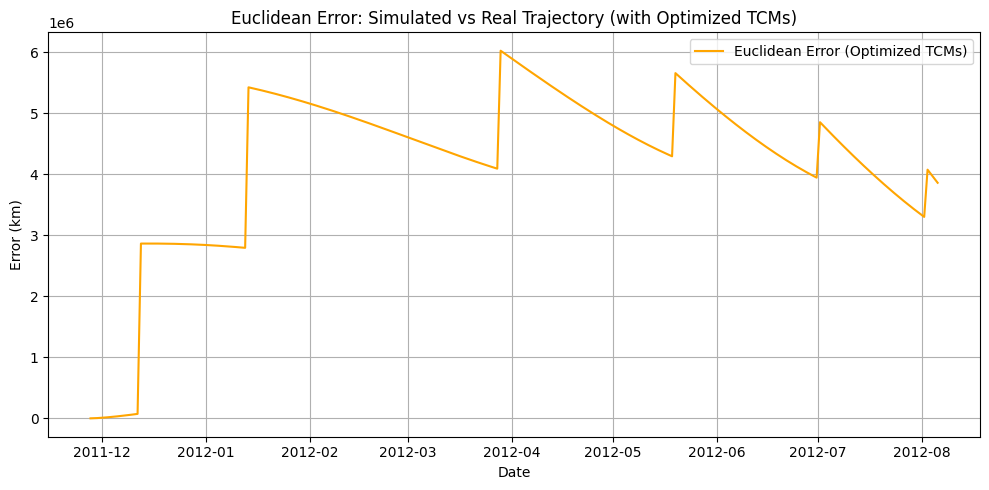

Max error:   6,024,497.97 km
Mean error:  4,206,646.69 km
Final error: 3,860,165.89 km


In [ ]:
# --- Euclidean Error Analysis for Optimized TCM Trajectory ---

# Convert Curiosity's real trajectory to meters
curiosity_x_m = np.array(curiosity_ephem['x']) * AU
curiosity_y_m = np.array(curiosity_ephem['y']) * AU

# Convert simulated trajectory to meters
rk_x_m = np.array(trajectory_x)
rk_y_m = np.array(trajectory_y)

# Trim to same length
min_len = min(len(curiosity_x_m), len(rk_x_m))
curiosity_x_m = curiosity_x_m[:min_len]
curiosity_y_m = curiosity_y_m[:min_len]
rk_x_m = rk_x_m[:min_len]
rk_y_m = rk_y_m[:min_len]
dates_trimmed = dates[:min_len]

# Compute Euclidean error (in km)
errors_m = np.sqrt((rk_x_m - curiosity_x_m)**2 + (rk_y_m - curiosity_y_m)**2)
errors_km = errors_m / 1000

# Plot error
plt.figure(figsize=(10, 5))
plt.plot(dates_trimmed, errors_km, label='Euclidean Error (Optimized TCMs)', color='orange')
plt.title('Euclidean Error: Simulated vs Real Trajectory (with Optimized TCMs)')
plt.xlabel('Date')
plt.ylabel('Error (km)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Summary statistics
print(f"Max error:   {np.max(errors_km):,.2f} km")
print(f"Mean error:  {np.mean(errors_km):,.2f} km")
print(f"Final error: {errors_km[-1]:,.2f} km")


### Where to possibly go from here?

#### See if the coding framework can be generalized to any mission that doesn't require any gravity assists?

#### Also, 5.7 million km is still a huge distance, nowhere close to Mars :(

# Sweep Angle Example

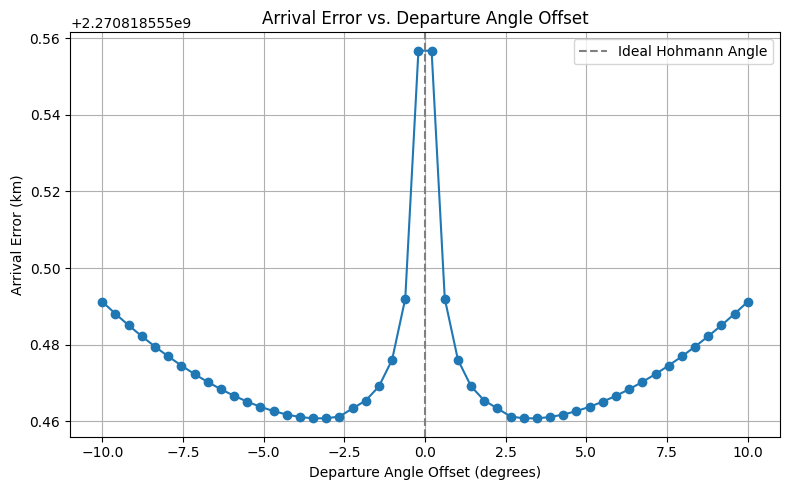

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
mu_sun = 1.327e11       # Gravitational parameter of the Sun (km^3/s^2)
AU = 1.496e8            # 1 AU in km
r_earth = AU
r_saturn = 9.5 * AU

# Angular velocity for circular orbit: ω = sqrt(μ / r^3)
omega_saturn = np.sqrt(mu_sun / r_saturn**3)

# Hohmann transfer time (approx)
T = np.pi * np.sqrt(((r_earth + r_saturn) ** 3) / (8 * mu_sun))  # seconds

# Initial velocity for Hohmann transfer at Earth (departure)
v_transfer = np.sqrt(2 * mu_sun * r_saturn / (r_earth * (r_earth + r_saturn)))

# Sweep departure angle offsets
angles_deg = np.linspace(-10, 10, 50)
arrival_errors = []

# Dynamics for the spacecraft under Sun's gravity
def two_body_dynamics(t, y):
    r = y[:3]
    v = y[3:]
    norm_r = np.linalg.norm(r)
    a = -mu_sun * r / norm_r**3
    return np.concatenate((v, a))

for angle in angles_deg:
    angle_rad = np.deg2rad(angle)

    # Velocity vector rotated from x-axis
    vx = v_transfer * np.cos(angle_rad)
    vy = v_transfer * np.sin(angle_rad)
    y0 = np.array([r_earth, 0, 0, 0, vx, vy])

    # Integrate trajectory using RK45
    sol = solve_ivp(
        two_body_dynamics,
        [0, T],
        y0,
        method='RK45',
        rtol=1e-9,
        atol=1e-11
    )

    # Final spacecraft position
    r_final = sol.y[:3, -1]

    # Saturn's position at arrival (circular orbit)
    theta_saturn = omega_saturn * T  # angular displacement
    saturn_x = r_saturn * np.cos(theta_saturn)
    saturn_y = r_saturn * np.sin(theta_saturn)
    r_saturn_final = np.array([saturn_x, saturn_y, 0])

    # Compute Euclidean error (arrival miss distance)
    error = np.linalg.norm(r_final - r_saturn_final)
    arrival_errors.append(error)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(angles_deg, arrival_errors, marker='o')
plt.axvline(0, color='gray', linestyle='--', label='Ideal Hohmann Angle')
plt.xlabel('Departure Angle Offset (degrees)')
plt.ylabel('Arrival Error (km)')
plt.title('Arrival Error vs. Departure Angle Offset')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
